In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from datetime import datetime
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as linear_model
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [5]:
# LESSON 1 BARPLOTS

In [6]:
train = pd.read_csv('/media/bagrat/Новый том/Загрузки/kaggle/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/media/bagrat/Новый том/Загрузки/kaggle/house-prices-advanced-regression-techniques/test.csv')

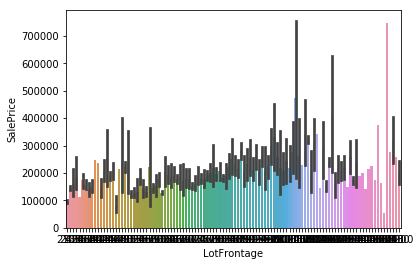

In [7]:
sns.barplot(x='LotFrontage',y='SalePrice',data=train)

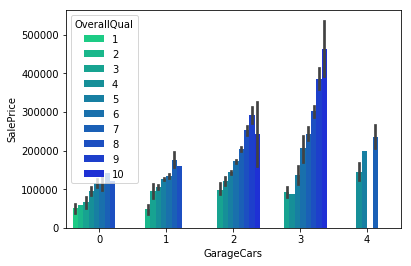

In [8]:
sns.barplot(x='GarageCars',y='SalePrice',data=train,hue='OverallQual',
           palette='winter_r')#цвет

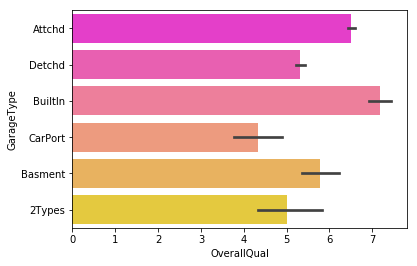

In [9]:
sns.barplot(x='OverallQual',y='GarageType',data=train,
            palette='spring')

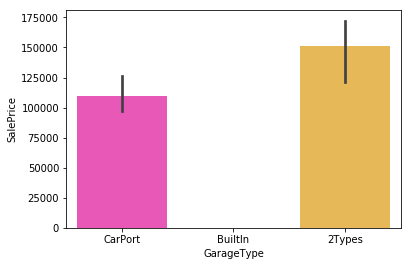

In [10]:
sns.barplot(x='GarageType',y='SalePrice',data=train, 
            palette='spring',order=['CarPort','Builtln',
                            '2Types'])#очередность и выборка

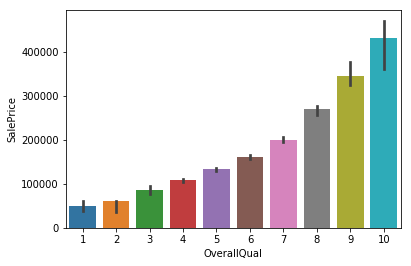

In [11]:
sns.barplot(x='OverallQual',y='SalePrice',data=train, 
            estimator=np.median)#оценка по медиане вместо mean

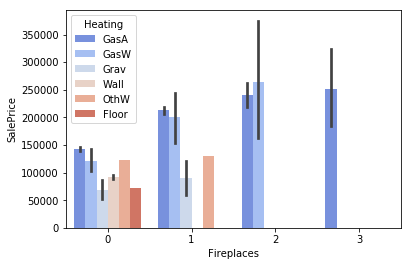

In [12]:
sns.barplot(x='Fireplaces',y='SalePrice',data=train,hue='Heating',palette='coolwarm')

In [13]:
# LESSON 2 BARPLOTS

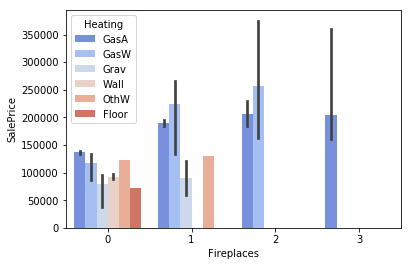

In [14]:
sns.barplot(x='Fireplaces',y='SalePrice',data=train,hue='Heating',
            estimator=np.median, palette='coolwarm')

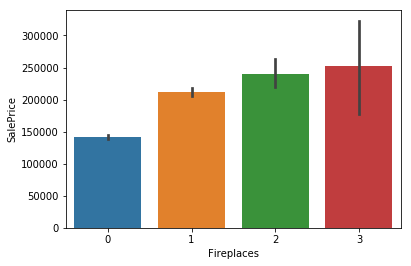

In [15]:
sns.barplot(x='Fireplaces',y='SalePrice',data=train)

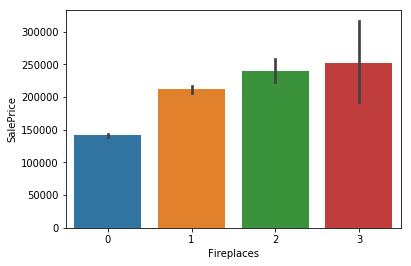

In [16]:
sns.barplot(x='Fireplaces',y='SalePrice',data=train,ci=90)
#размер черных палок

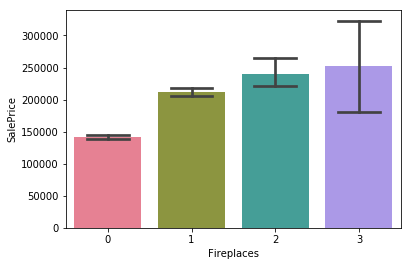

In [17]:
sns.barplot(x='Fireplaces',y='SalePrice',
            data=train,capsize=0.5, palette='husl')#размер крышки

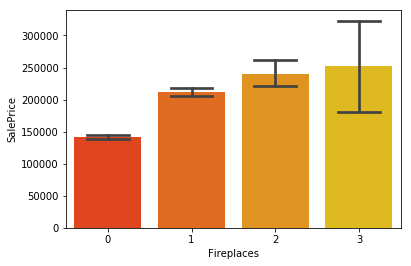

In [18]:
sns.barplot(x='Fireplaces',y='SalePrice',
            data=train,capsize=0.5, palette='autumn')

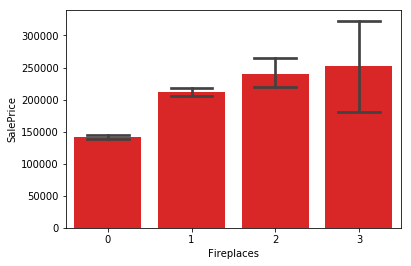

In [19]:
sns.barplot(x='Fireplaces',y='SalePrice',
            data=train,capsize=0.5,
            color='red',saturation=0.7)#цвет и насыщенность

In [20]:
#LESSON 3 DISTPLOTS

In [21]:
num=np.random.randn(150)

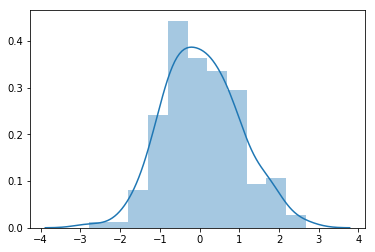

In [22]:
sns.distplot(num)

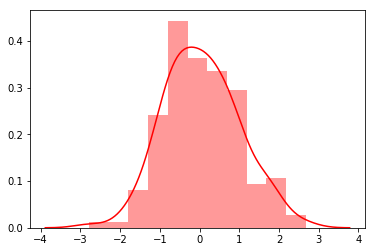

In [23]:
sns.distplot(num,color='red')

In [24]:
label_dist=pd.Series(num,name="var_x")

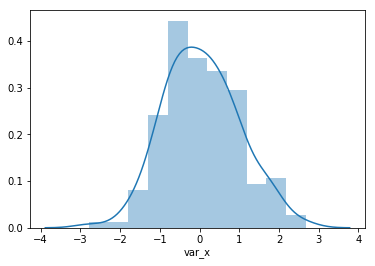

In [25]:
sns.distplot(label_dist)

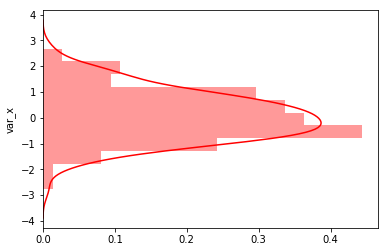

In [26]:
sns.distplot(label_dist,vertical=True,color='red')

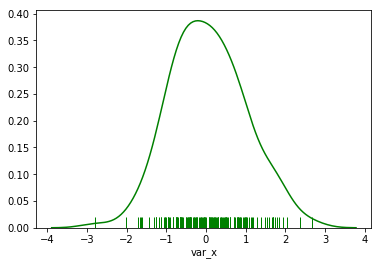

In [27]:
sns.distplot(label_dist,hist=False,color='green',rug=True)

In [28]:
#LESSON 4 BOXPLOTS

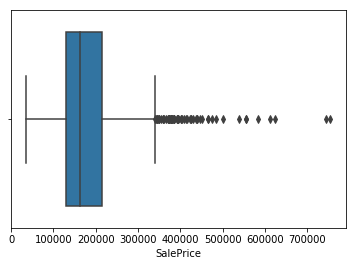

In [29]:
sns.boxplot(x=train['SalePrice'])

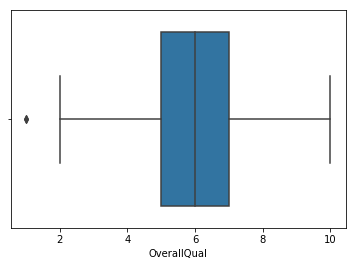

In [30]:
sns.boxplot(x=train['OverallQual'])

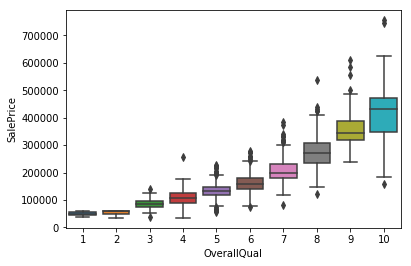

In [31]:
sns.boxplot(x='OverallQual',y='SalePrice',data=train)

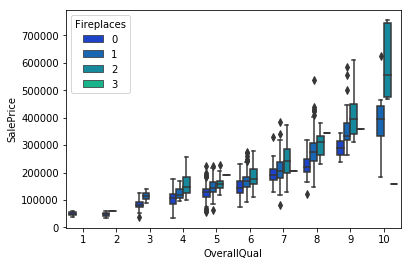

In [32]:
sns.boxplot(x='OverallQual',y='SalePrice',
            data=train, hue='Fireplaces',palette='winter')

In [33]:
# LESSON 6 BOXPLOT 

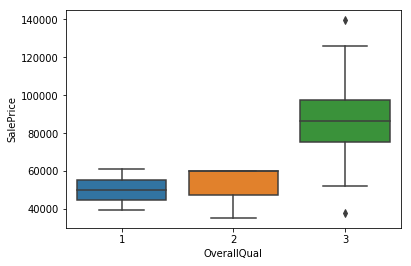

In [34]:
sns.boxplot(x='OverallQual',y='SalePrice',
            data=train, order=[1,2,3])

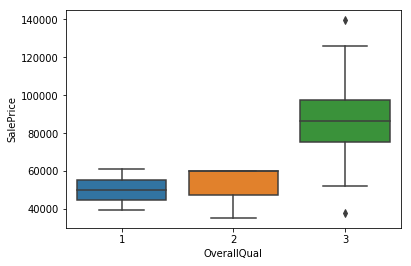

In [35]:
sns.boxplot(x='OverallQual',y='SalePrice',
            data=train, order=[1,2,3])

In [36]:
iris=sns.load_dataset('iris')

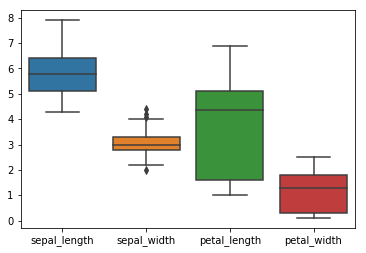

In [37]:
sns.boxplot(data=iris)

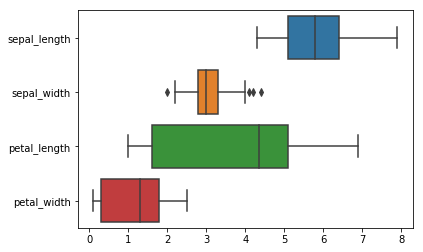

In [38]:
sns.boxplot(data=iris,orient='h')

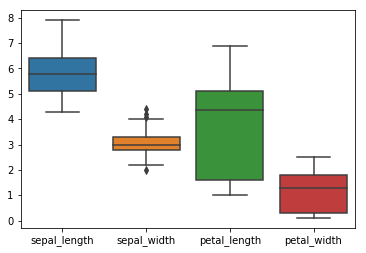

In [39]:
sns.boxplot(data=iris,orient='v')

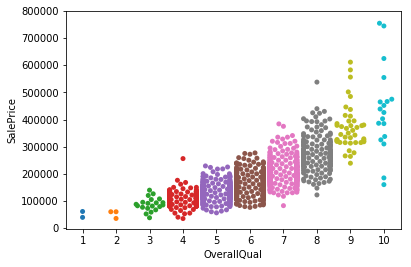

In [40]:

sns.swarmplot(x='OverallQual',y='SalePrice',
            data=train, )

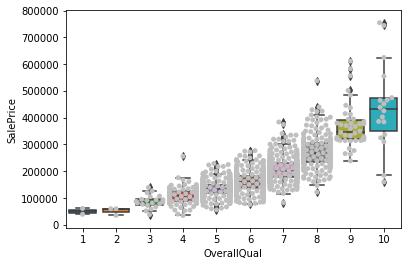

In [41]:
sns.boxplot(x='OverallQual',y='SalePrice',
            data=train, )
sns.swarmplot(x='OverallQual',y='SalePrice',
            data=train,color='0.75' )#рой

In [42]:
# LESSON 7 STRIPPLOTS

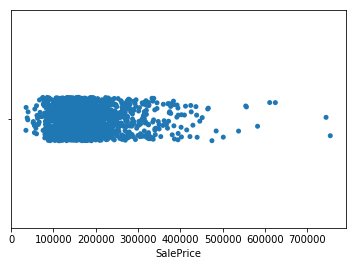

In [43]:
 sns.stripplot(x=train['SalePrice'])

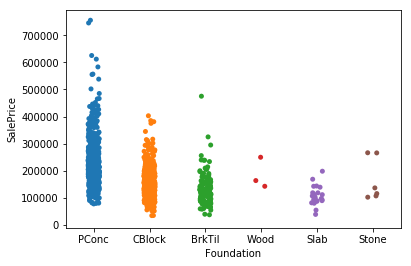

In [44]:
 sns.stripplot(x='Foundation',y='SalePrice',
            data=train,)

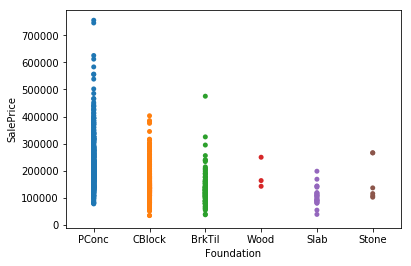

In [45]:
sns.stripplot(x='Foundation',y='SalePrice',
            data=train,jitter=False)#в линию

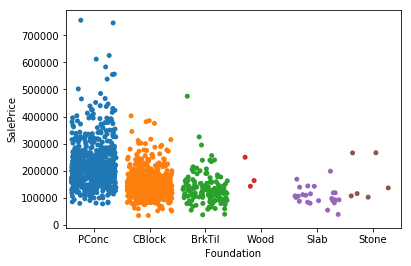

In [46]:
sns.stripplot(x='Foundation',y='SalePrice',
            data=train,jitter=0.4)

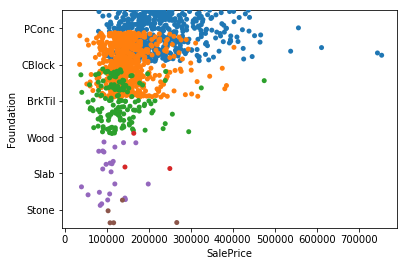

In [47]:
sns.stripplot(x='SalePrice',y='Foundation',
            data=train,jitter=0.9)

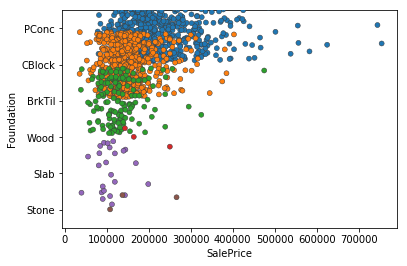

In [48]:
sns.stripplot(x='SalePrice',y='Foundation',
            data=train,jitter=0.9, linewidth=0.5)

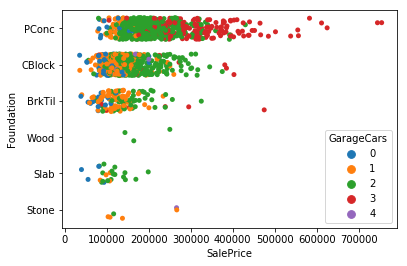

In [49]:
sns.stripplot(x='SalePrice',y='Foundation',
            data=train,hue='GarageCars',jitter=0.3)

In [50]:
 # LESSON 8 STRIPPLOTS

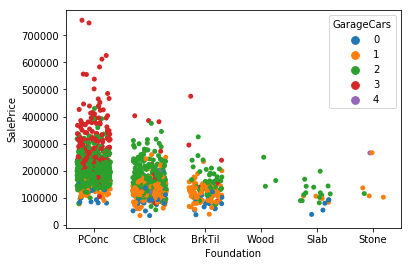

In [51]:
sns.stripplot(x='Foundation',y='SalePrice',
            data=train,hue='GarageCars',jitter=0.3)

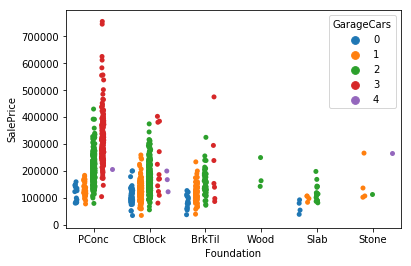

In [52]:
sns.stripplot(x='Foundation',y='SalePrice',
            data=train,hue='GarageCars',
              jitter=True,split=True) # разделение

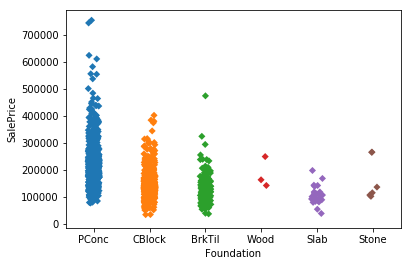

In [53]:
sns.stripplot(x='Foundation',y='SalePrice',
            data=train,marker='D')# точки бриллианты

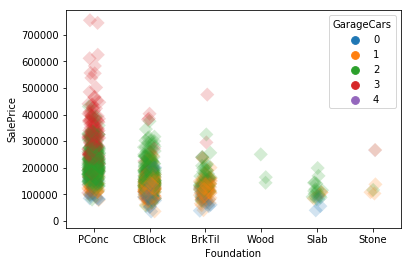

In [54]:
sns.stripplot(x='Foundation',y='SalePrice',
            data=train,marker='D',size=10,hue='GarageCars',
            edgecolor='green', alpha=0.2)
#edge контур, размер точек и прозрачность

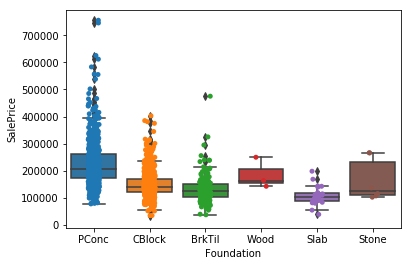

In [55]:
sns.stripplot(x='Foundation',y='SalePrice',data=train)
sns.boxplot(x='Foundation',y='SalePrice',data=train)

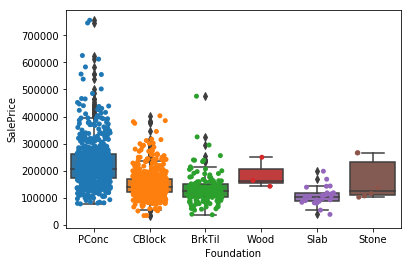

In [56]:
sns.stripplot(x='Foundation',y='SalePrice',data=train,jitter=0.3)
sns.boxplot(x='Foundation',y='SalePrice',data=train)

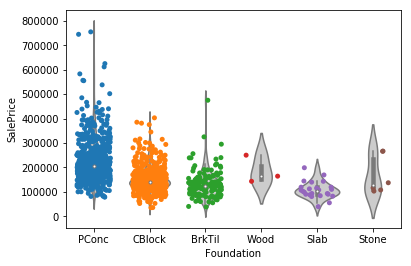

In [57]:
sns.stripplot(x='Foundation',y='SalePrice',
              data=train,jitter=0.3)
sns.violinplot(x='Foundation',y='SalePrice',
              data=train,color='0.8')

In [58]:
# LESSON 8 PAIRGRID

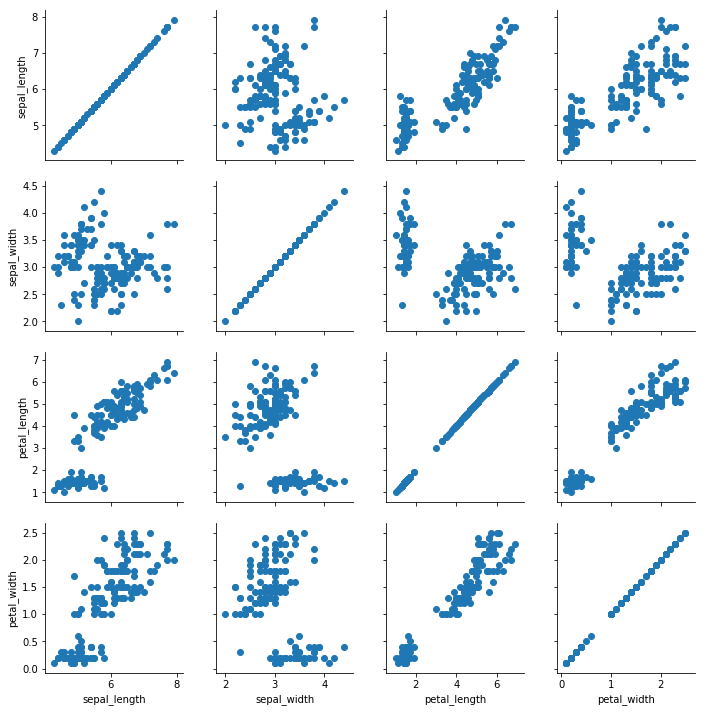

In [59]:
iris=sns.load_dataset('iris')
x=sns.PairGrid(iris)
x=x.map(plt.scatter)

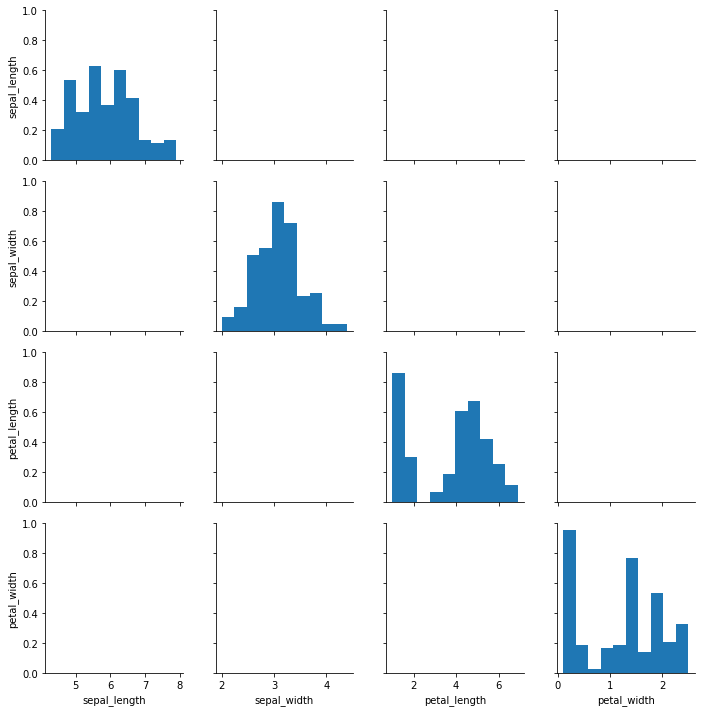

In [60]:
x=sns.PairGrid(iris)
x=x.map_diag(plt.hist)

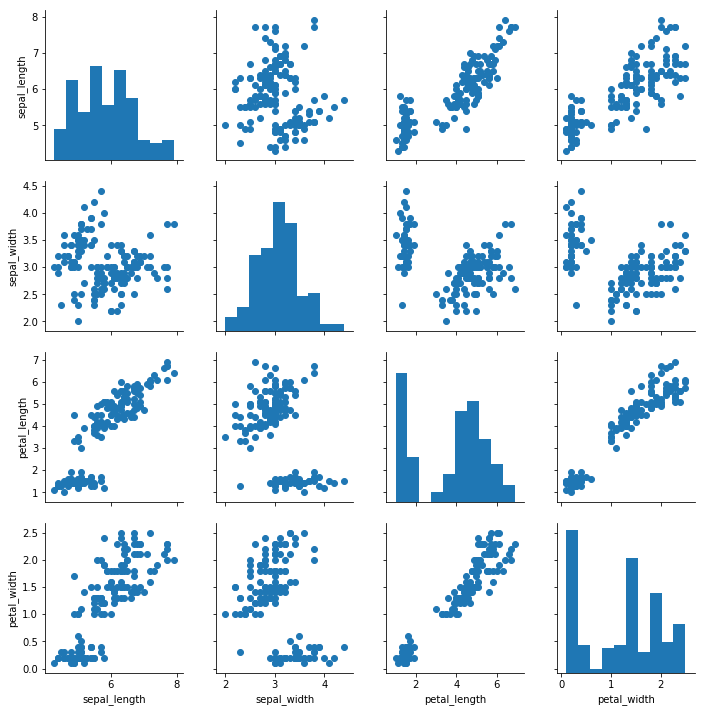

In [61]:
x=sns.PairGrid(iris)
x=x.map_diag(plt.hist)
x=x.map_offdiag(plt.scatter)

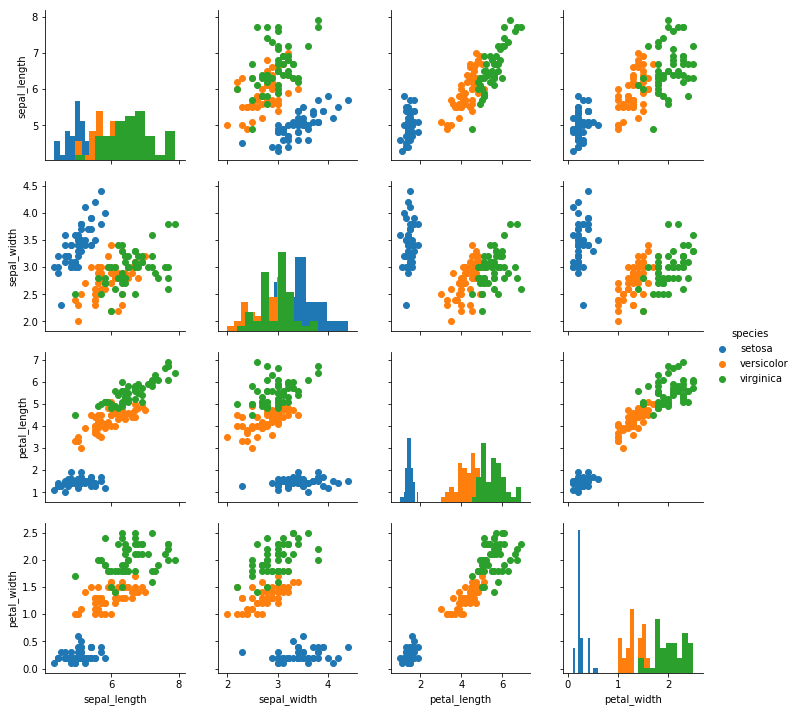

In [62]:
x=sns.PairGrid(iris,hue='species')
x=x.map_diag(plt.hist)
x=x.map_offdiag(plt.scatter)
x=x.add_legend()

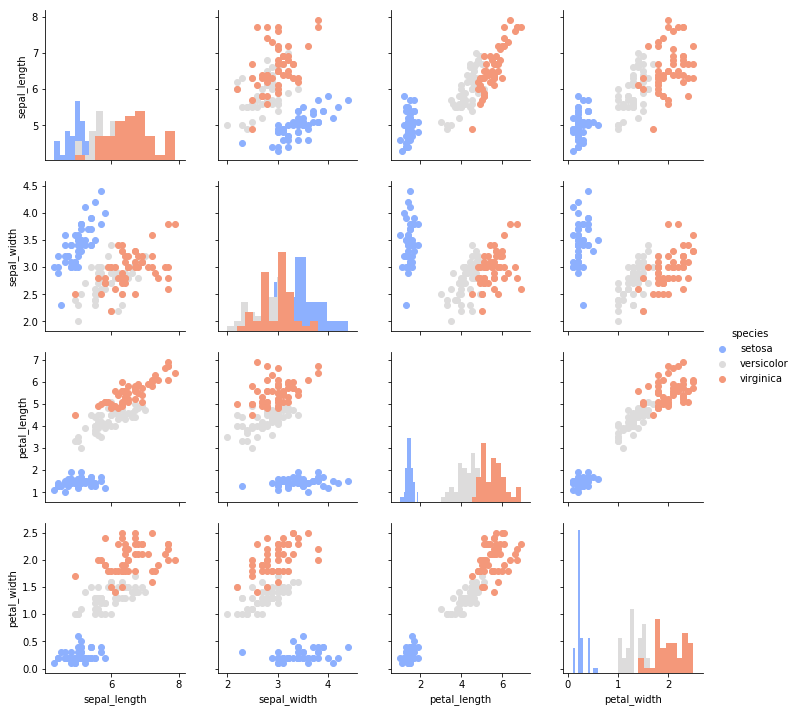

In [63]:
x=sns.PairGrid(iris,hue='species',palette='coolwarm')
x=x.map_diag(plt.hist)
x=x.map_offdiag(plt.scatter)
x=x.add_legend()

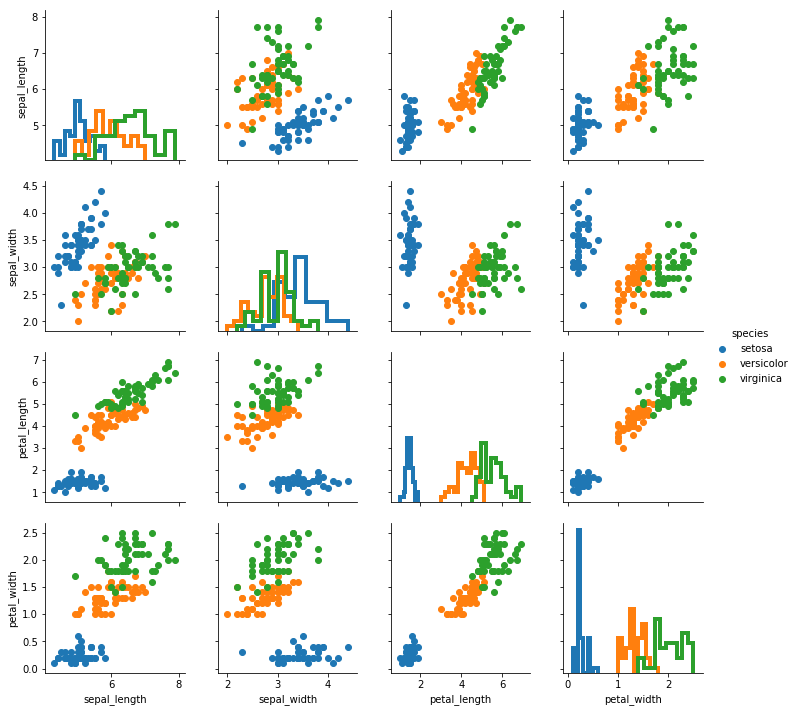

In [64]:
x=sns.PairGrid(iris,hue='species')
x=x.map_diag(plt.hist,histtype='step',linewidth=4)
x=x.map_offdiag(plt.scatter)
x=x.add_legend()

In [65]:
# LESSON 9 PAIRGRID 2

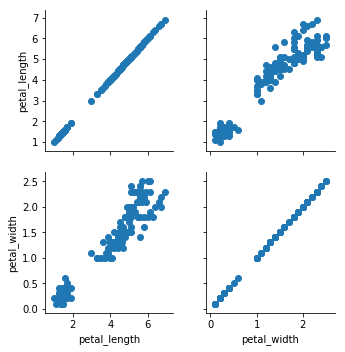

In [66]:
x=sns.PairGrid(iris,vars=['petal_length','petal_width'])
x=x.map(plt.scatter)

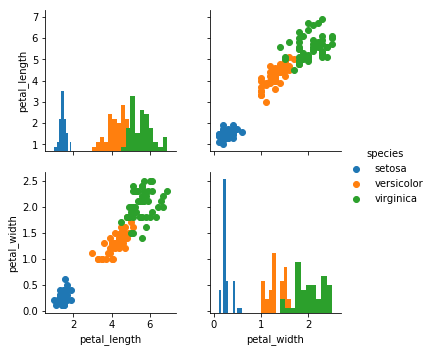

In [67]:
x=sns.PairGrid(iris,hue='species',
               vars=['petal_length','petal_width'])
x=x.map_diag(plt.hist)
x=x.map_offdiag(plt.scatter)
x=x.add_legend()

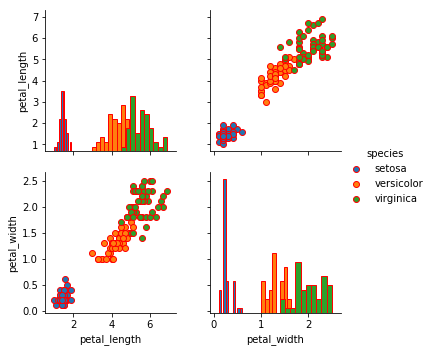

In [68]:
x=sns.PairGrid(iris,hue='species',
               vars=['petal_length','petal_width'])
x=x.map_diag(plt.hist, edgecolor='red')
x=x.map_offdiag(plt.scatter,edgecolor='red')
x=x.add_legend()

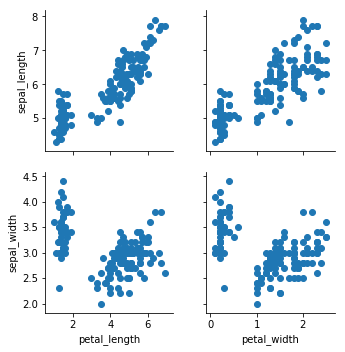

In [69]:
x=sns.PairGrid(iris,x_vars=['petal_length','petal_width'],
                           y_vars=['sepal_length','sepal_width'])
x=x.map(plt.scatter)

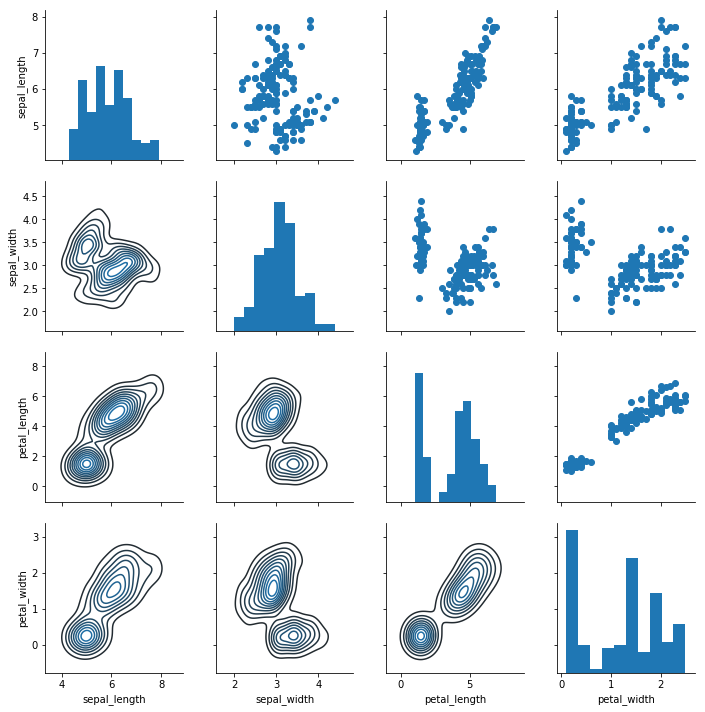

In [70]:
x=sns.PairGrid(iris)
x=x.map_diag(plt.hist)
x=x.map_upper(plt.scatter)
x=x.map_lower(sns.kdeplot)

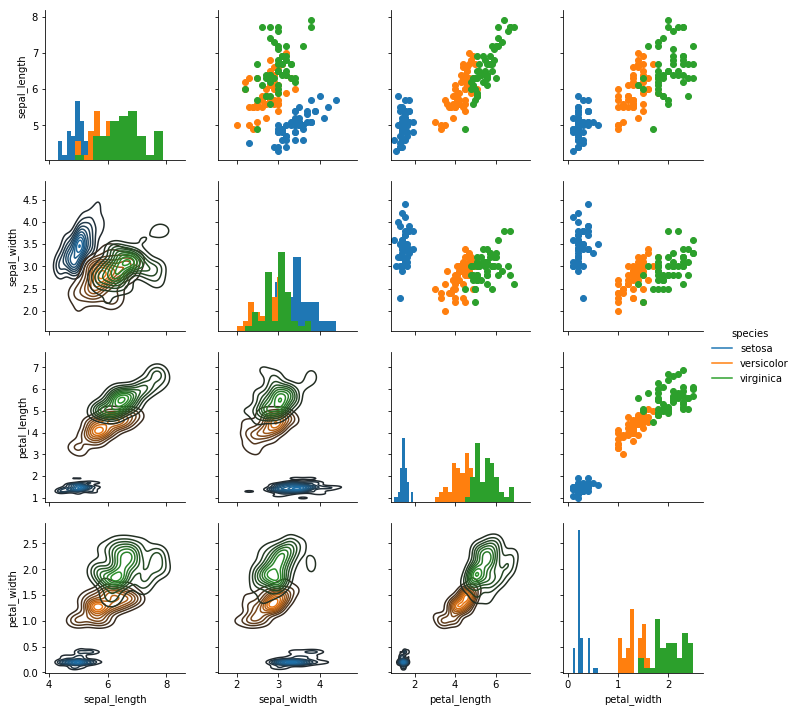

In [71]:
x=sns.PairGrid(iris, hue='species')
x=x.map_diag(plt.hist)
x=x.map_upper(plt.scatter)
x=x.map_lower(sns.kdeplot)
x=x.add_legend()

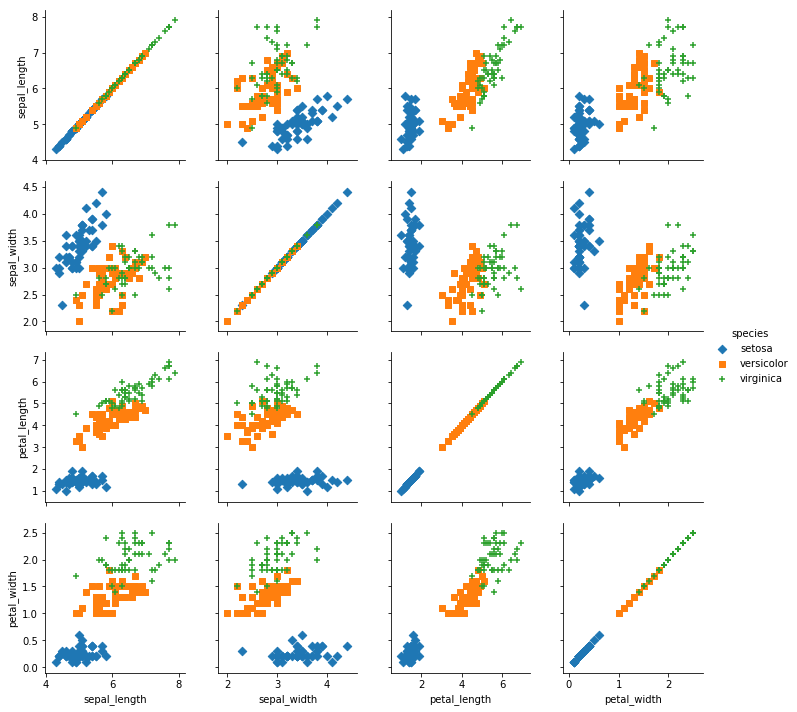

In [72]:
x=sns.PairGrid(iris,hue='species',hue_kws={'marker':['D','s','+']})
x=x.map(plt.scatter)
x=x.add_legend()

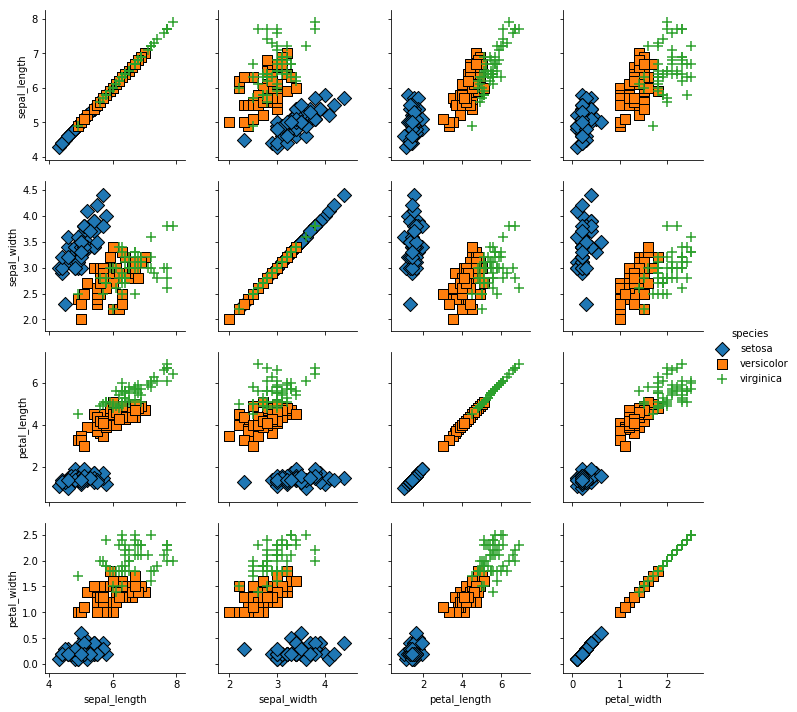

In [73]:
x=sns.PairGrid(iris,hue='species',hue_kws={'marker':['D','s','+']})
x=x.map(plt.scatter,s=100,edgecolor='black')
x=x.add_legend()

In [74]:
# LESSON 10 VIOLIN PLOT 1

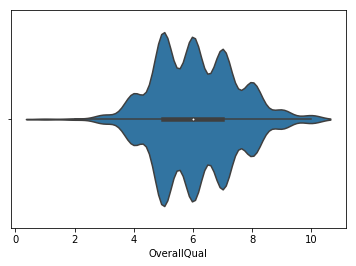

In [75]:
sns.violinplot(x=train['OverallQual'])

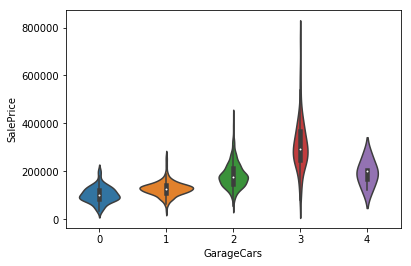

In [76]:
sns.violinplot(x=train['GarageCars'],y=train['SalePrice'])

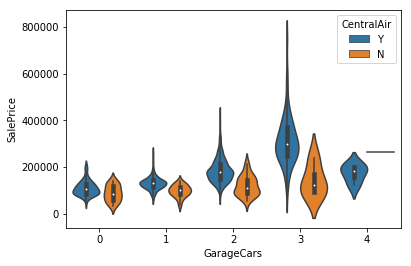

In [77]:
sns.violinplot(x='GarageCars',y='SalePrice',
               hue='CentralAir',data=train)

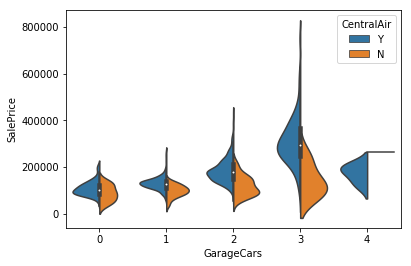

In [78]:
sns.violinplot(x='GarageCars',y='SalePrice',
               hue='CentralAir',data=train,split=True)

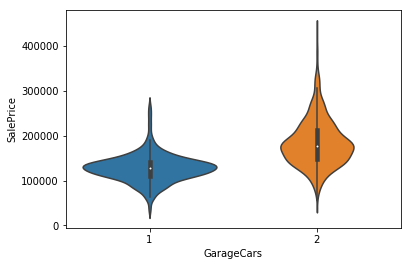

In [79]:
sns.violinplot(x='GarageCars',y='SalePrice',data=train,order=[1,2])

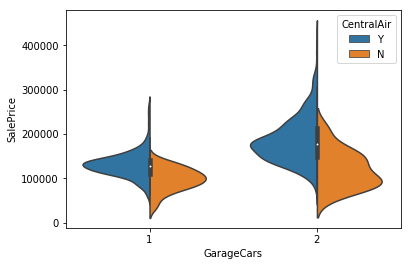

In [80]:
sns.violinplot(x='GarageCars',y='SalePrice',hue='CentralAir',split=True,
               data=train,order=[1,2])

In [81]:
# LESSON 11 VIOLIN PLOT 2

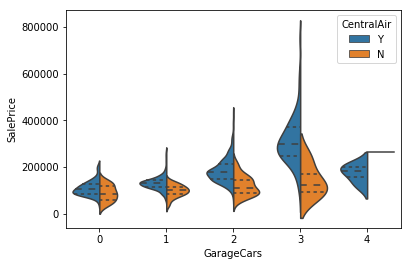

In [82]:
sns.violinplot(x='GarageCars',y='SalePrice',hue='CentralAir',
               split=True,data=train,inner='quartile')

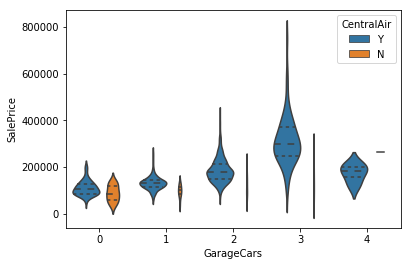

In [83]:
sns.violinplot(x='GarageCars',y='SalePrice',hue='CentralAir',
               data=train,inner='quartile',scale='count') # масштаб

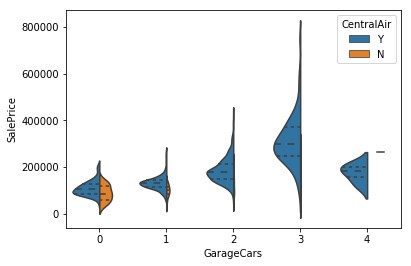

In [84]:
sns.violinplot(x='GarageCars',y='SalePrice',hue='CentralAir',
               split=True,data=train,inner='quartile',scale='count')

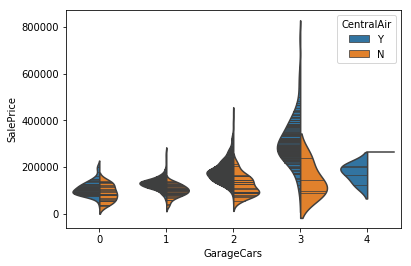

In [85]:
sns.violinplot(x='GarageCars',y='SalePrice',hue='CentralAir',
               split=True,data=train,inner='stick')#заполнение значениями

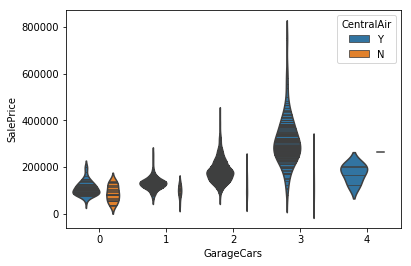

In [86]:
sns.violinplot(x='GarageCars',y='SalePrice',hue='CentralAir',
               data=train,inner='stick',scale='count')

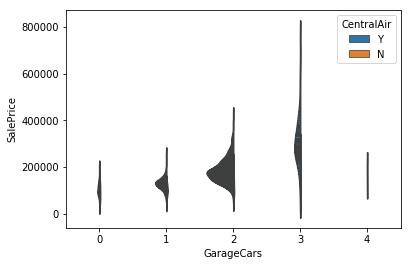

In [87]:
sns.violinplot(x='GarageCars',y='SalePrice',hue='CentralAir',
               data=train,inner='stick',
               split=True, scale='count',scale_hue=False,)

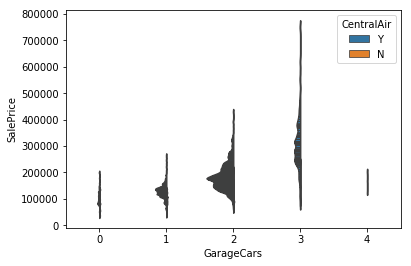

In [88]:
sns.violinplot(x='GarageCars',y='SalePrice',hue='CentralAir',
               data=train,inner='stick',
               split=True, scale='count',scale_hue=False,bw=0.1)

In [89]:
# LESSON 12 CLUSTERMAP 1

In [90]:
flights=sns.load_dataset('flights')

In [91]:
flights.tail()

year      month  passengers
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

In [92]:
flights=flights.pivot('month','year','passengers')

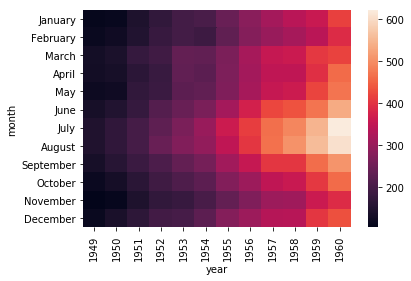

In [93]:
sns.heatmap(flights)

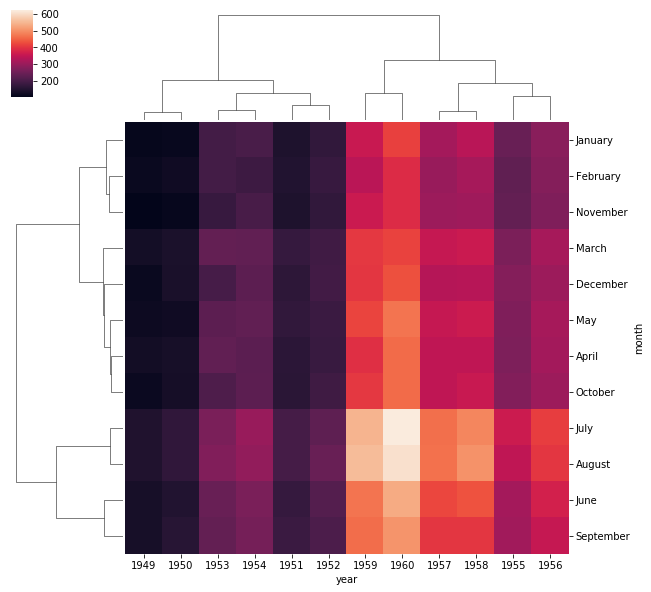

In [94]:
sns.clustermap(flights)

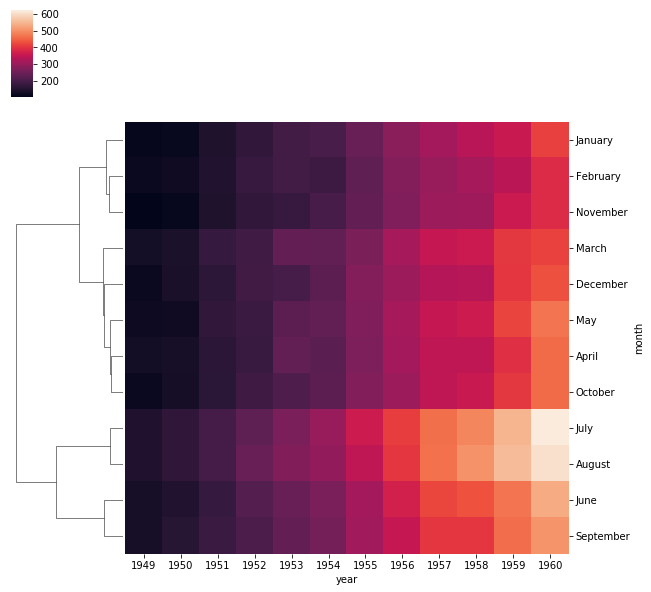

In [95]:
sns.clustermap(flights,col_cluster=False)

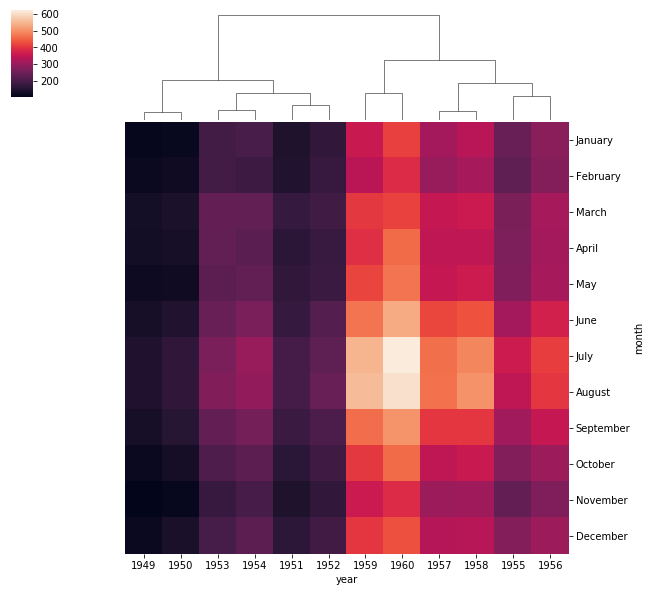

In [96]:
sns.clustermap(flights,row_cluster=False)

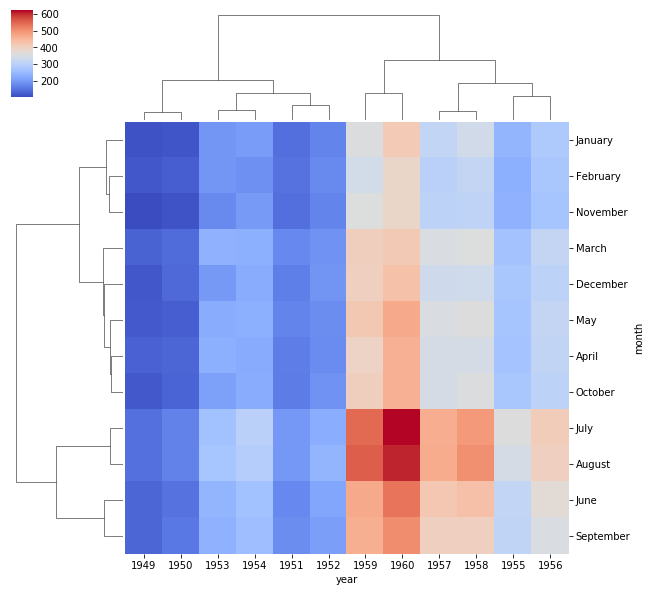

In [97]:
sns.clustermap(flights,cmap='coolwarm')

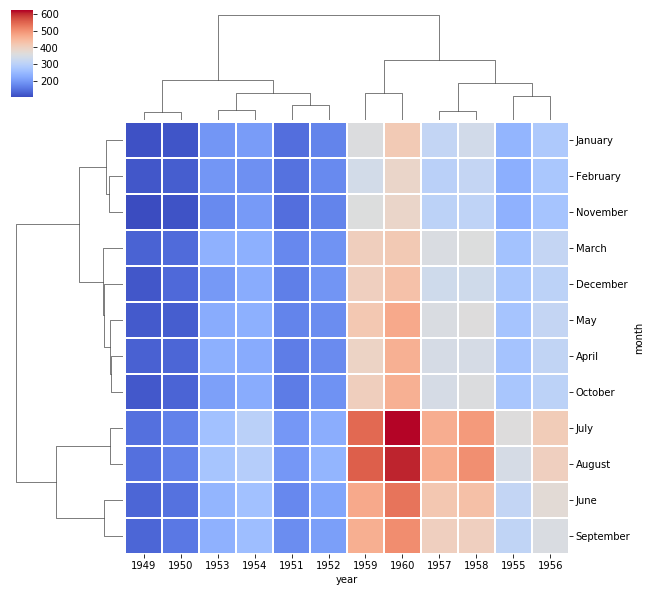

In [98]:
sns.clustermap(flights,cmap='coolwarm',linewidth=1)

In [99]:
# LESSON 12 CLUSTERMAP 2

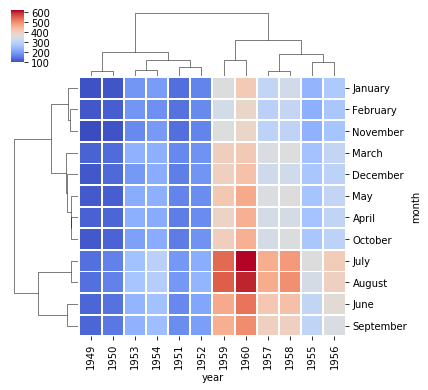

In [100]:
sns.clustermap(flights,cmap='coolwarm',linewidth=1,figsize=(6,6))

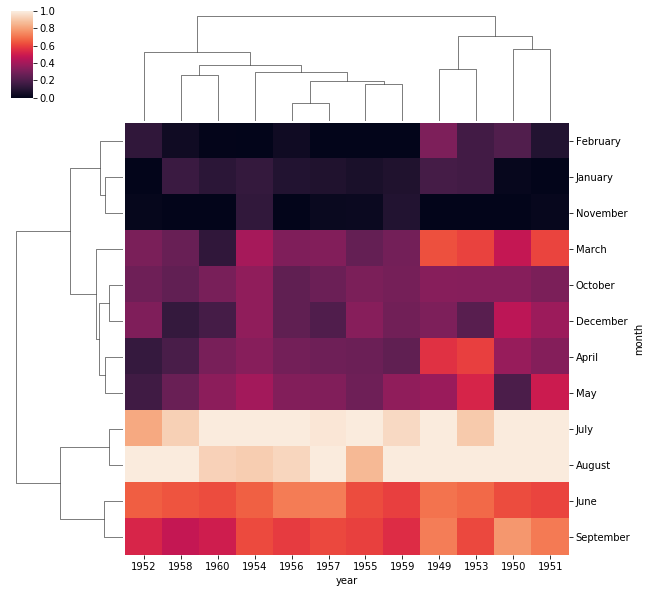

In [101]:
sns.clustermap(flights,standard_scale=1)
#стандартизировать по столбцам или строкам 0(строки), 1(столбцы)

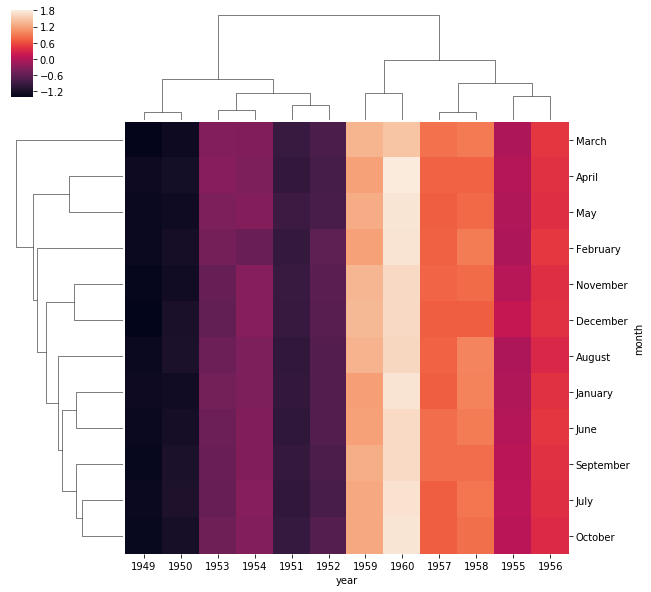

In [102]:
sns.clustermap(flights,z_score=0) 
# нормализация датасета z_score 0(строки), 1(столбцы)

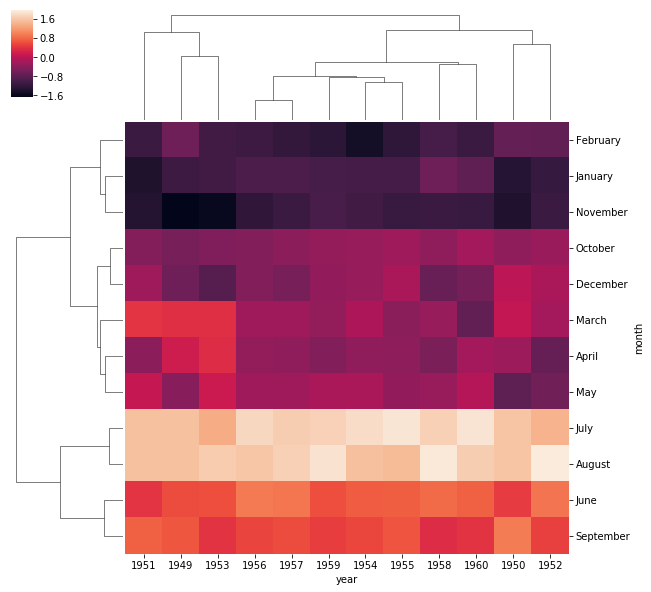

In [103]:
sns.clustermap(flights,z_score=1)

In [104]:
# LESSON 13 HEATMAP 1

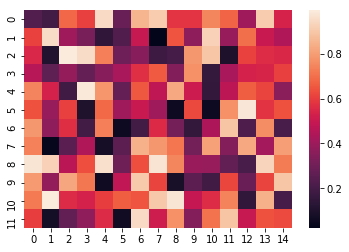

In [105]:
normal=np.random.rand(12,15)
sns.heatmap(normal)

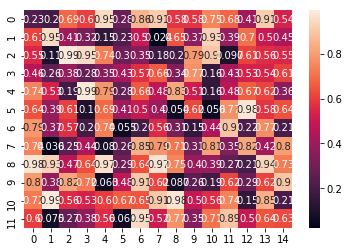

In [106]:
sns.heatmap(normal,annot=True)

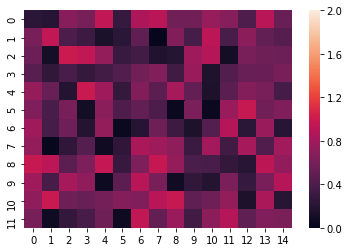

In [107]:
sns.heatmap(normal,vmin=0,vmax=2)

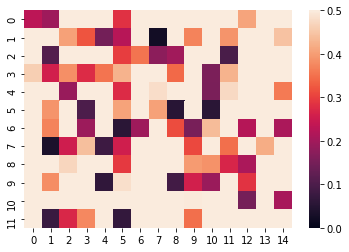

In [108]:
sns.heatmap(normal,vmin=0,vmax=0.5)

In [109]:
flights=sns.load_dataset('flights')

In [110]:
flights.tail()

year      month  passengers
139  1960     August         606
140  1960  September         508
141  1960    October         461
142  1960   November         390
143  1960   December         432

In [111]:
flights=flights.pivot('month','year','passengers')

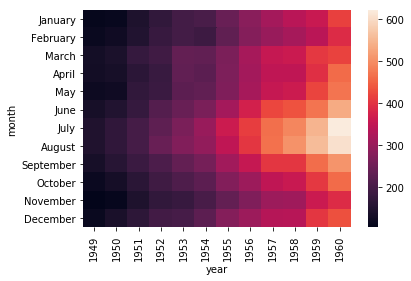

In [112]:
sns.heatmap(flights)

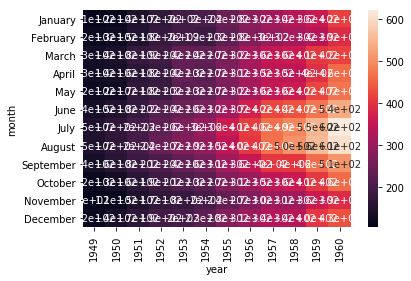

In [113]:
sns.heatmap(flights,annot=True)

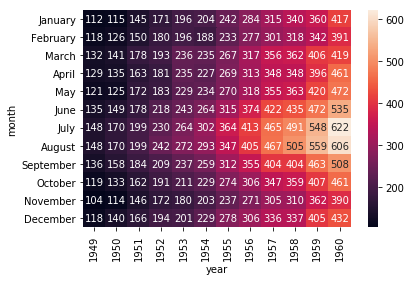

In [114]:
sns.heatmap(flights,annot=True,fmt='d')

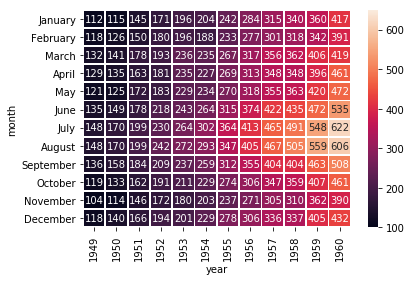

In [115]:
sns.heatmap(flights,annot=True,fmt='d',
            linewidths=0.9,vmin=100,vmax=650)

In [116]:
# LESSON 13 HEATMAP 2

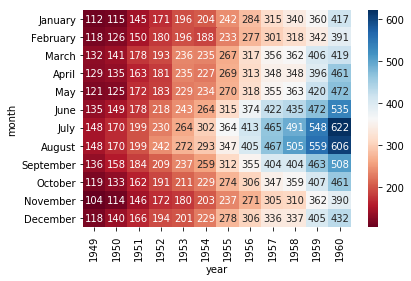

In [117]:
sns.heatmap(flights,cmap='RdBu',annot=True,fmt='d')

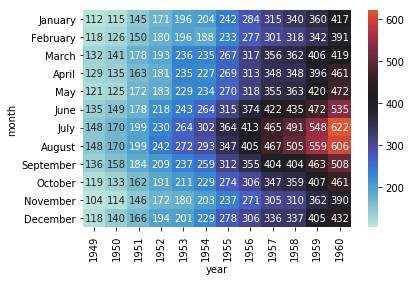

In [118]:
sns.heatmap(flights,center=flights.loc['March',1960],
            annot=True,fmt='d')

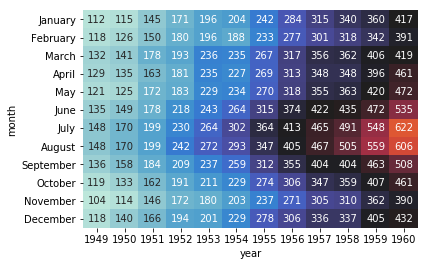

In [119]:
sns.heatmap(flights,center=flights.loc['March',1960],
            annot=True,fmt='d',cbar=False)
#убрать шкалу

In [120]:
# LESSON 14 FacetGrid 1

In [121]:
tips=sns.load_dataset('tips')

In [122]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

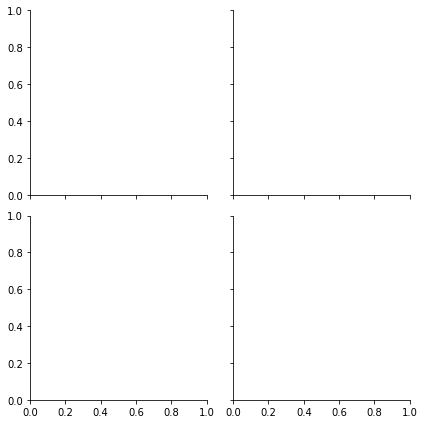

In [123]:
sns.FacetGrid(tips,row='smoker',col='time')
# графики всех возмождных сочетаний

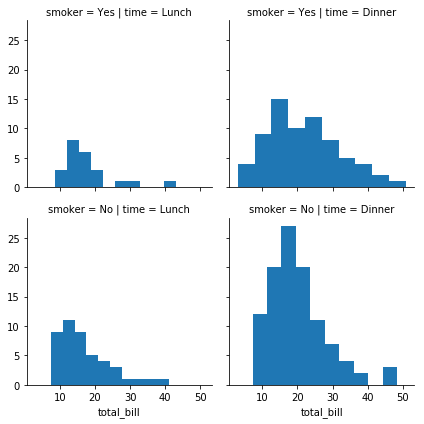

In [124]:
x=sns.FacetGrid(tips,row='smoker',col='time')
x=x.map(plt.hist,'total_bill')
# рисуем на графиках то что нас интересует

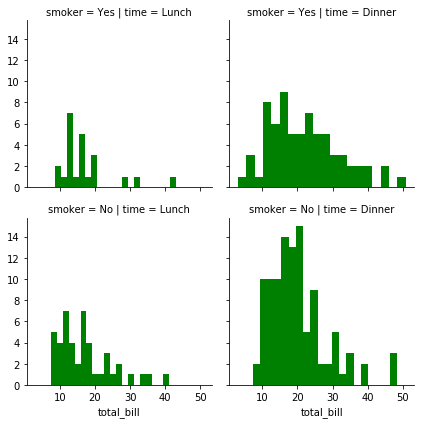

In [125]:
x=sns.FacetGrid(tips,row='smoker',col='time')
x=x.map(plt.hist,'total_bill',color='green',bins=20)
# количество палок

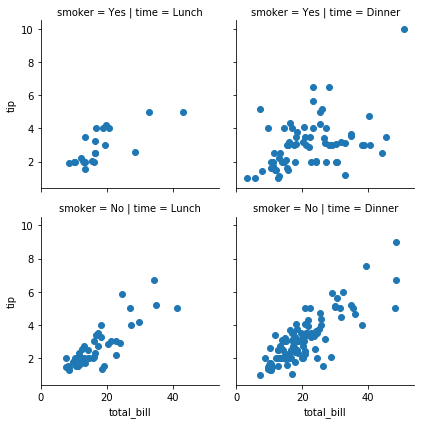

In [126]:
x=sns.FacetGrid(tips,col='time',row='smoker')
x=x.map(plt.scatter,'total_bill','tip')

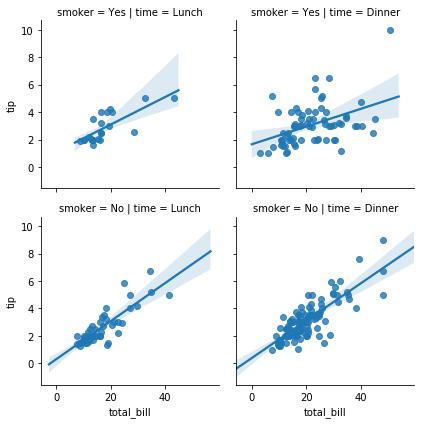

In [127]:
x=sns.FacetGrid(tips,col='time',row='smoker')
x=x.map(sns.regplot,'total_bill','tip')

In [128]:
# LESSON 15 FacetGrid 2

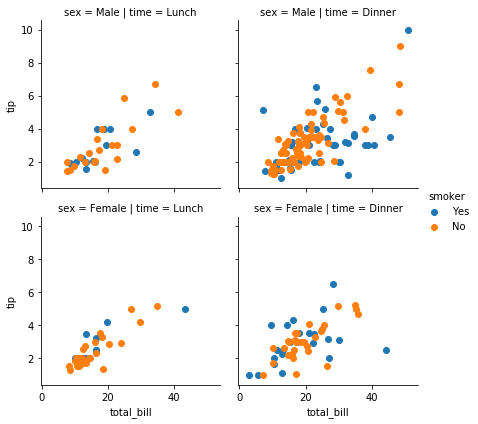

In [129]:
x=sns.FacetGrid(tips,col='time',row='sex',hue='smoker')
x=x.map(plt.scatter,'total_bill','tip').add_legend()
# можно крмбинировать с hue

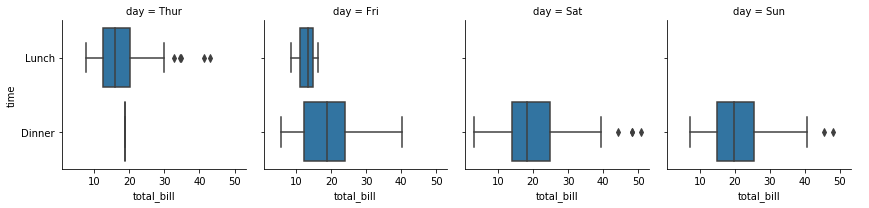

In [130]:
x=sns.FacetGrid(tips,col='day')
x=x.map(sns.boxplot,'total_bill','time').add_legend()

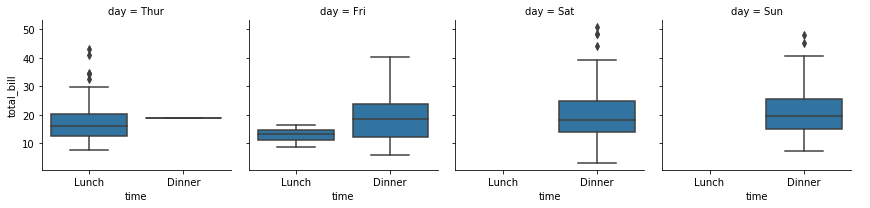

In [131]:
x=sns.FacetGrid(tips,col='day')
x=x.map(sns.boxplot,'time','total_bill',).add_legend()

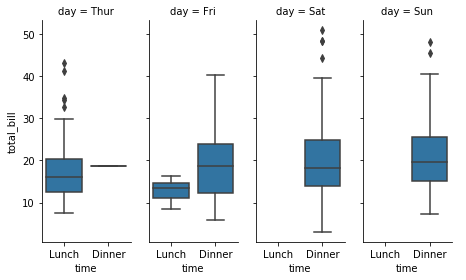

In [132]:
x=sns.FacetGrid(tips,col='day',size=4,aspect=0.4)
x=x.map(sns.boxplot,'time','total_bill',).add_legend()
# aspect вытягивает картинку

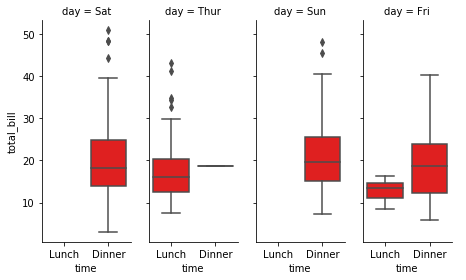

In [133]:
x=sns.FacetGrid(tips,col='day',size=4,aspect=0.4,
                col_order=['Sat','Thur','Sun','Fri'], )
x=x.map(sns.boxplot,'time','total_bill',color='red').add_legend()

In [134]:
# LESSON 16 KDE PLOTS (kernel density estimation) сглаживание данных
#ядерная оценка плотности 
#(использует PDF(функция плотности вероятности))
# Ядерная оценка плотности (ЯОП, англ. Kernel Density Estimation, KDE) — это непараметрический способ оценки плотности случайной величины. Ядерная оценка плотности является задачей сглаживания данных, когда делается заключение о совокупности, основываясь на конечных выборках данных. В некоторых областях, таких как обработка сигналов и математическая экономика, метод называется также методом окна Парзена-Розенблатта. Как считается, Эммануэль Парзен и Мюррей Розенблатт независимо создали метод в существующем виде.


In [135]:
mean=[0,0]
cov=([0.2,0],[0,3])

In [136]:
x_axis, y_axis=np.random.multivariate_normal(mean,cov,size=40).T

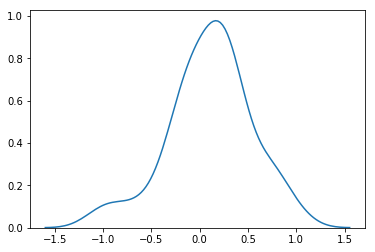

In [137]:
sns.kdeplot(x_axis)

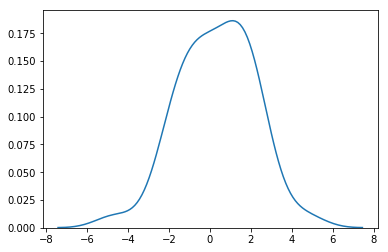

In [138]:
sns.kdeplot(y_axis)

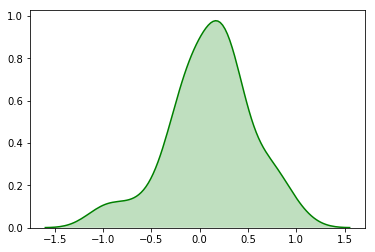

In [139]:
sns.kdeplot(x_axis,shade=True,color='green')#тень

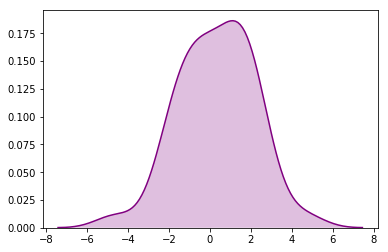

In [140]:
sns.kdeplot(y_axis,shade=True,color='purple')

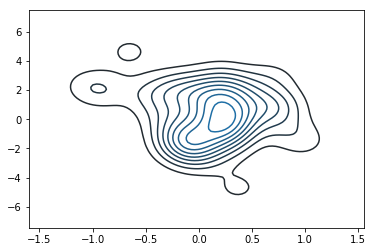

In [141]:
sns.kdeplot(x_axis,y_axis)

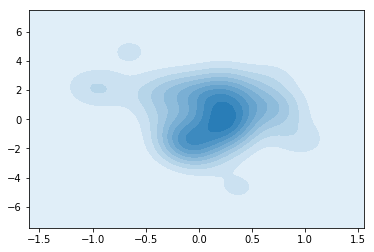

In [142]:
sns.kdeplot(x_axis,y_axis,shade=True)

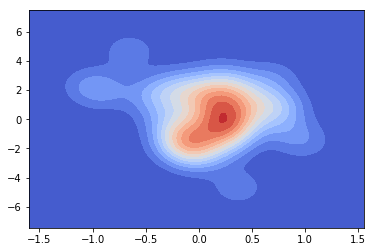

In [143]:
sns.kdeplot(x_axis,y_axis,shade=True,cmap='coolwarm',n_levels=15)
#количество колец

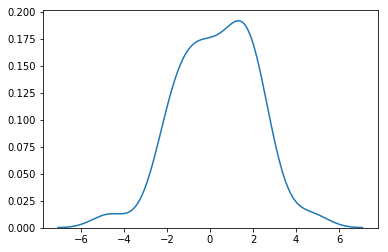

In [144]:
sns.kdeplot(y_axis,bw=0.8)#пропускная способность

In [145]:
# LESSON 17 KDE PLOTS 2

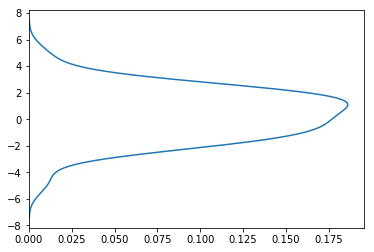

In [146]:
sns.kdeplot(y_axis, vertical=True)

In [147]:
iris=sns.load_dataset('iris')

In [148]:
iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
6             4.6          3.4           1.4          0.3     setosa
7             5.0          3.4           1.5          0.2     setosa
8             4.4          2.9           1.4          0.2     setosa
9             4.9          3.1           1.5          0.1     setosa
10            5.4          3.7           1.5          0.2     setosa
11            4.8          3.4           1.6          0.2     setosa
12            4.8          3.0           1.4          0.1     setosa
13            4.3          3.0           1.1          0.1     setosa
14            5.8          4.0           1.2          0.2     setosa
15            5.7          4.4           1.5          0.4     setosa
16            5.4          3.9           1.3          0.4     setosa
17            5.1          3.5           1.4          0.3     setosa
18            5.7          3.8           1.7          0.3     setosa
19            5.1          3.8           1.5          0.3     setosa
20            5.4          3.4           1.7          0.2     setosa
21            5.1          3.7           1.5          0.4     setosa
22            4.6          3.6           1.0          0.2     setosa
23            5.1          3.3           1.7          0.5     setosa
24            4.8          3.4           1.9          0.2     setosa
25            5.0          3.0           1.6          0.2     setosa
26            5.0          3.4           1.6          0.4     setosa
27            5.2          3.5           1.5          0.2     setosa
28            5.2          3.4           1.4          0.2     setosa
29            4.7          3.2           1.6          0.2     setosa
..            ...          ...           ...          ...        ...
120           6.9          3.2           5.7          2.3  virginica
121           5.6          2.8           4.9          2.0  virginica
122           7.7          2.8           6.7          2.0  virginica
123           6.3          2.7           4.9          1.8  virginica
124           6.7          3.3           5.7          2.1  virginica
125           7.2          3.2           6.0          1.8  virginica
126           6.2          2.8           4.8          1.8  virginica
127           6.1          3.0           4.9          1.8  virginica
128           6.4          2.8           5.6          2.1  virginica
129           7.2          3.0           5.8          1.6  virginica
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
146

In [149]:
setosa=iris.loc[iris.species == 'setosa']
setosa

sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
1            4.9          3.0           1.4          0.2  setosa
2            4.7          3.2           1.3          0.2  setosa
3            4.6          3.1           1.5          0.2  setosa
4            5.0          3.6           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
6            4.6          3.4           1.4          0.3  setosa
7            5.0          3.4           1.5          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
9            4.9          3.1           1.5          0.1  setosa
10           5.4          3.7           1.5          0.2  setosa
11           4.8          3.4           1.6          0.2  setosa
12           4.8          3.0           1.4          0.1  setosa
13           4.3          3.0           1.1          0.1  setosa
14           5.8          4.0           1.2          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa
16           5.4          3.9           1.3          0.4  setosa
17           5.1          3.5           1.4          0.3  setosa
18           5.7          3.8           1.7          0.3  setosa
19           5.1          3.8           1.5          0.3  setosa
20           5.4          3.4           1.7          0.2  setosa
21           5.1          3.7           1.5          0.4  setosa
22           4.6          3.6           1.0          0.2  setosa
23           5.1          3.3           1.7          0.5  setosa
24           4.8          3.4           1.9          0.2  setosa
25           5.0          3.0           1.6          0.2  setosa
26           5.0          3.4           1.6          0.4  setosa
27           5.2          3.5           1.5          0.2  setosa
28           5.2          3.4           1.4          0.2  setosa
29           4.7          3.2           1.6          0.2  setosa
30           4.8          3.1           1.6          0.2  setosa
31           5.4          3.4           1.5          0.4  setosa
32           5.2          4.1           1.5          0.1  setosa
33           5.5          4.2           1.4          0.2  setosa
34           4.9          3.1           1.5          0.2  setosa
35           5.0          3.2           1.2          0.2  setosa
36           5.5          3.5           1.3          0.2  setosa
37           4.9          3.6           1.4          0.1  setosa
38           4.4          3.0           1.3          0.2  setosa
39           5.1          3.4           1.5          0.2  setosa
40           5.0          3.5           1.3          0.3  setosa
41           4.5          2.3           1.3          0.3  setosa
42           4.4          3.2           1.3          0.2  setosa
43           5.0          3.5           1.6          0.6  setosa
44           5.1          3.8           1.9          0.4  setosa
45           4.8          3.0           1.4          0.3  setosa
46           5.1          3.8           1.6          0.2  setosa
47           4.6          3.2           1.4          0.2  setosa
48           5.3          3.7           1.5          0.2  setosa
49           5.0          3.3           1.4          0.2  setosa

In [150]:
versicolor=iris.loc[iris.species == 'versicolor']

In [151]:
versicolor.head()

sepal_length  sepal_width  petal_length  petal_width     species
50           7.0          3.2           4.7          1.4  versicolor
51           6.4          3.2           4.5          1.5  versicolor
52           6.9          3.1           4.9          1.5  versicolor
53           5.5          2.3           4.0          1.3  versicolor
54           6.5          2.8           4.6          1.5  versicolor

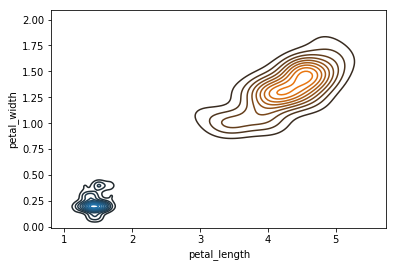

In [152]:
sns.kdeplot(setosa.petal_length,setosa.petal_width)
sns.kdeplot(versicolor.petal_length,versicolor.petal_width)

In [ ]:
# LESSON 18 JOIN PLOTS 1

In [154]:
tips=sns.load_dataset('tips')

In [155]:
iris=sns.load_dataset('iris')

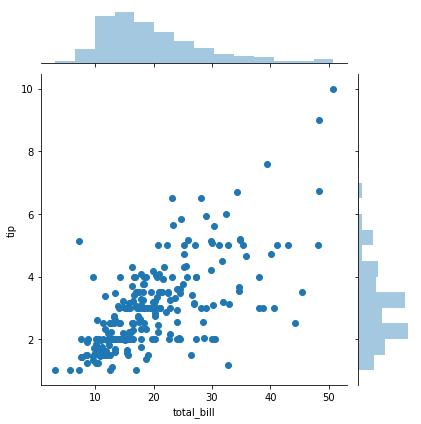

In [157]:
sns.jointplot(x='total_bill',y='tip',data=tips)

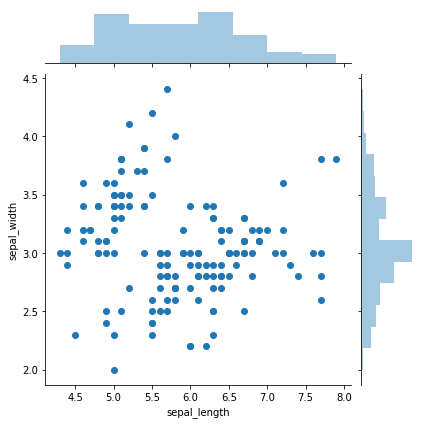

In [160]:
sns.jointplot(x='sepal_length',y='sepal_width',data=iris)

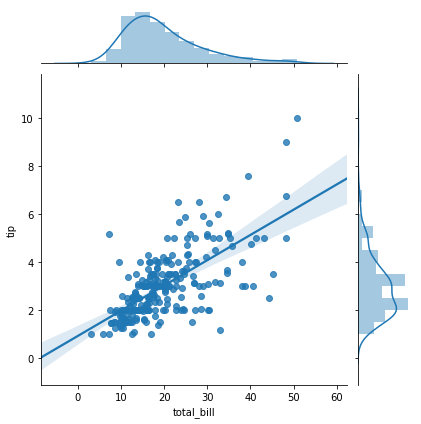

In [161]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

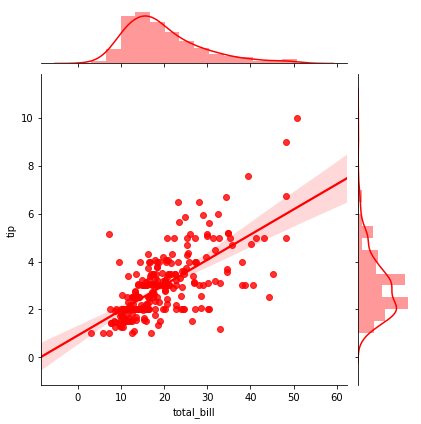

In [162]:
sns.jointplot(x='total_bill',y='tip',data=tips,
              kind='reg',color='red')

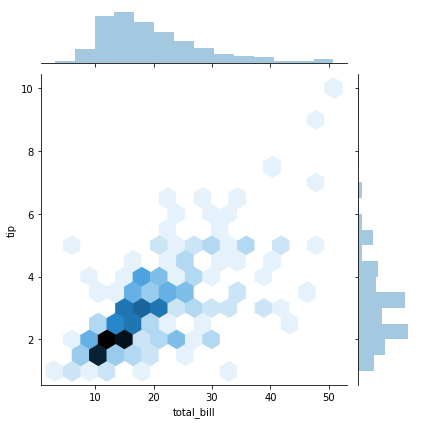

In [163]:
sns.jointplot(x='total_bill',y='tip',data=tips,
              kind='hex') 

In [ ]:
# LESSON 19 JOIN PLOTS 2

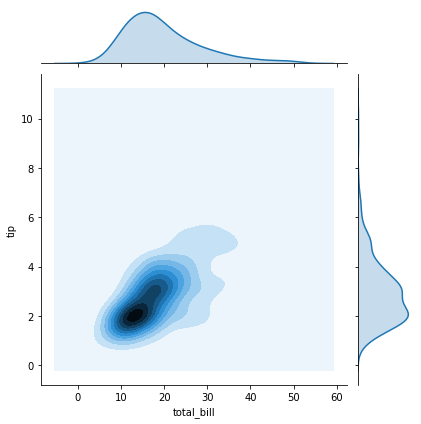

In [164]:
 sns.jointplot(x='total_bill',y='tip',data=tips,
              kind='kde') 

In [165]:
# stat_func

In [166]:
from scipy.stats import spearmanr

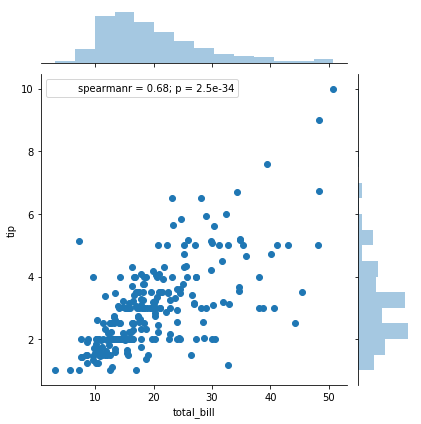

In [167]:
sns.jointplot(x='total_bill',y='tip',data=tips,
             stat_func=spearmanr) 
# Коэффициент корреляции Спирмена (Spearman rank correlation coefficient) — мера линейной связи между случайными величинами. Корреляция Спирмена является ранговой, то есть для оценки силы связи используются не численные значения, а соответствующие им ранги 

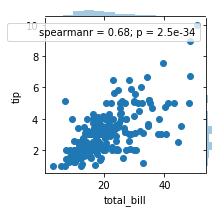

In [172]:
sns.jointplot(x='total_bill',y='tip',data=tips,
             stat_func=spearmanr,ratio=20,size=3) # соотношение

In [ ]:
# LESSON 20 REG PLOTS 1

In [173]:
tips=sns.load_dataset('tips')

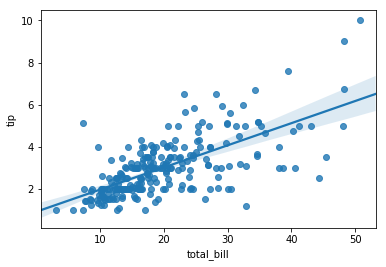

In [174]:
sns.regplot(x='total_bill',y='tip',data=tips)

In [178]:
mean=[2,5]
cov=[[1.1,0.4],[2.2,3]]
x,y=np.random.multivariate_normal(mean,cov,10).T

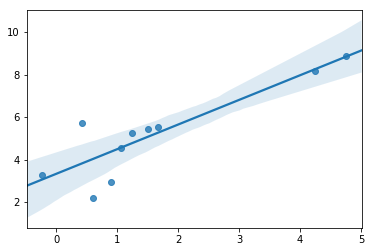

In [179]:
sns.regplot(x=x,y=y)

In [180]:
ser_x=pd.Series(x,name="var_x")
ser_y=pd.Series(y,name="var_y")

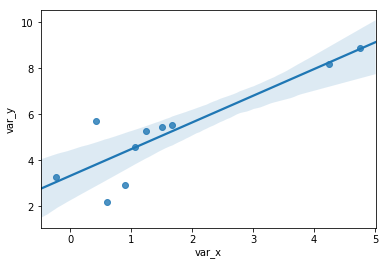

In [182]:
sns.regplot(x=ser_x,y=ser_y,)

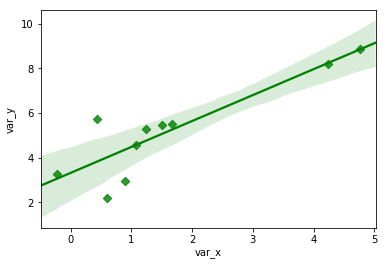

In [183]:
sns.regplot(x=ser_x,y=ser_y,marker='D',color='green')

In [ ]:
# LESSON 21 REG PLOTS 2

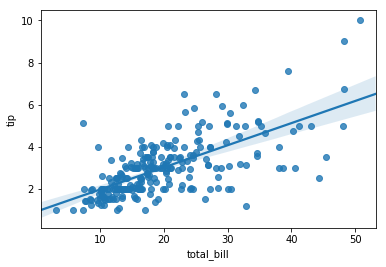

In [184]:
sns.regplot(x='total_bill',y='tip',data=tips)

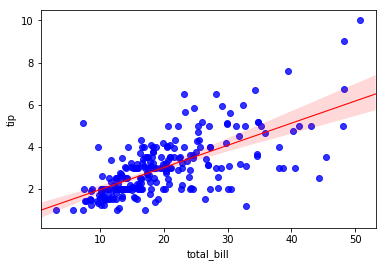

In [189]:
sns.regplot(x='total_bill',y='tip',data=tips,
           scatter_kws={'marker':'D','color':'blue'},
           line_kws={'color':'red', 'linewidth':1.1})

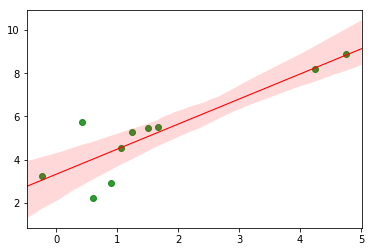

In [190]:
sns.regplot(x=x,y=y,
           scatter_kws={'marker':'D','color':'green'},
           line_kws={'color':'red', 'linewidth':1.1})

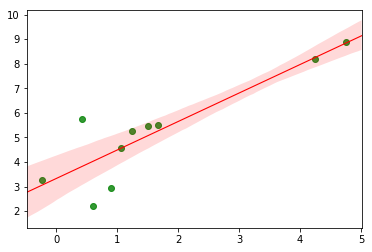

In [194]:
sns.regplot(x=x,y=y,ci=90,
           scatter_kws={'marker':'D','color':'green'},
           line_kws={'color':'red', 'linewidth':1.1})
# ci - Размер доверительного интервала для оценки регрессии. Это будет составлено с использованием полупрозрачных полос вокруг линии регрессии. Доверительный интервал оценивается с использованием бутстрапа; для больших наборов данных может быть целесообразным избежать этого вычисления, установив этот параметр в None.

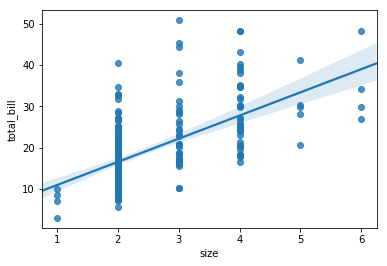

In [195]:
sns.regplot(x='size',y='total_bill',data=tips)

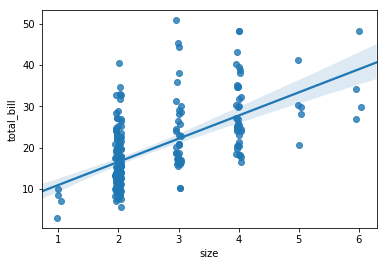

In [197]:
sns.regplot(x='size',y='total_bill',data=tips,x_jitter=0.05)

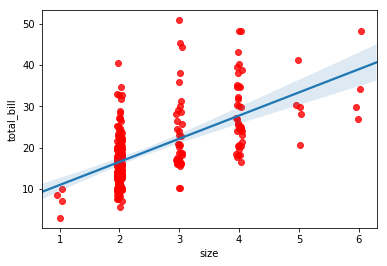

In [198]:
sns.regplot(x='size',y='total_bill',data=tips,
            x_jitter=0.05,scatter_kws={'color':'red'})

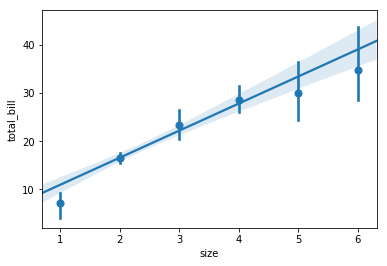

In [200]:
sns.regplot(x='size',y='total_bill',data=tips,
            x_estimator=np.mean)

In [201]:
# LESSON 21 PAIR PLOTS 1

In [203]:
iris=sns.load_dataset('iris')

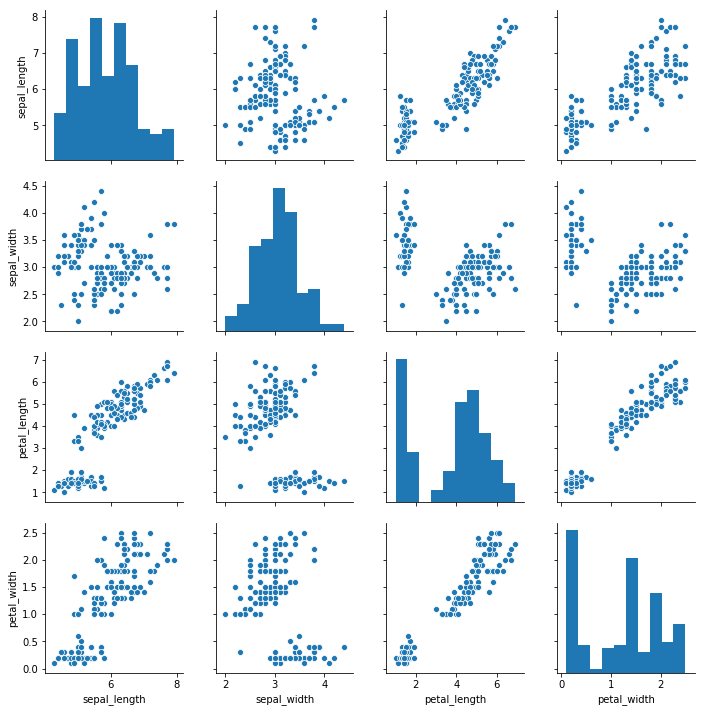

In [206]:
sns.pairplot(iris)

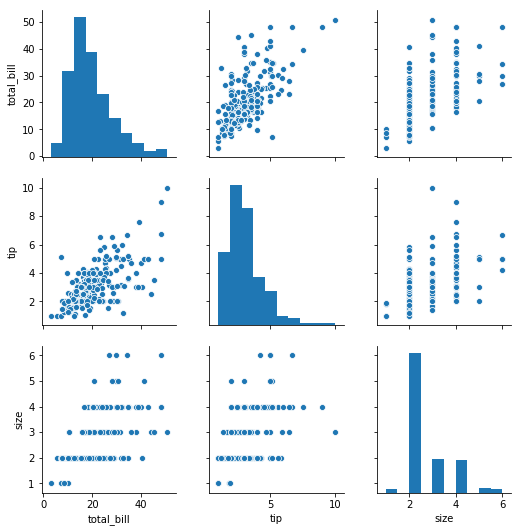

In [207]:
sns.pairplot(tips)

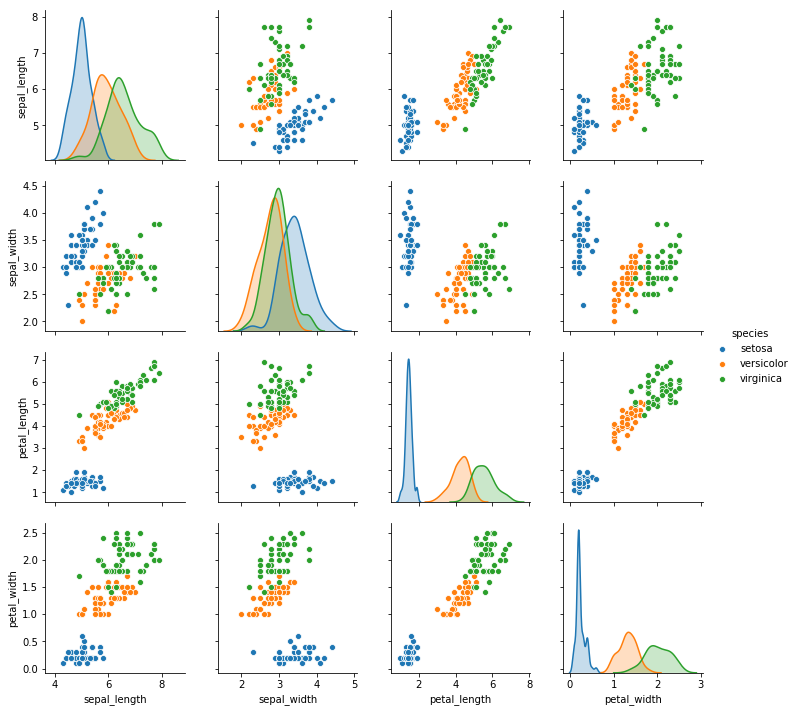

In [208]:
sns.pairplot(iris,hue='species')

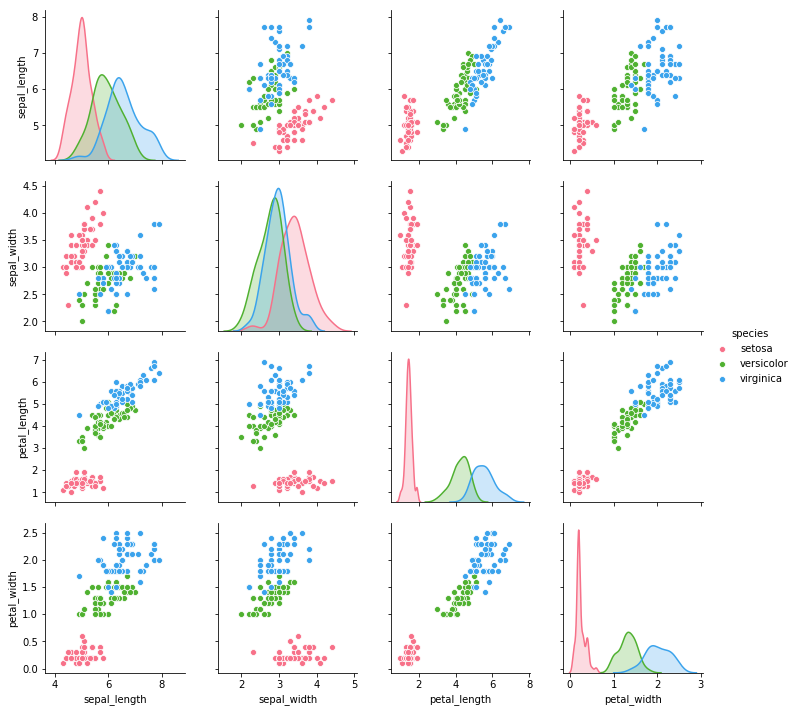

In [209]:
sns.pairplot(iris,hue='species',palette='husl')

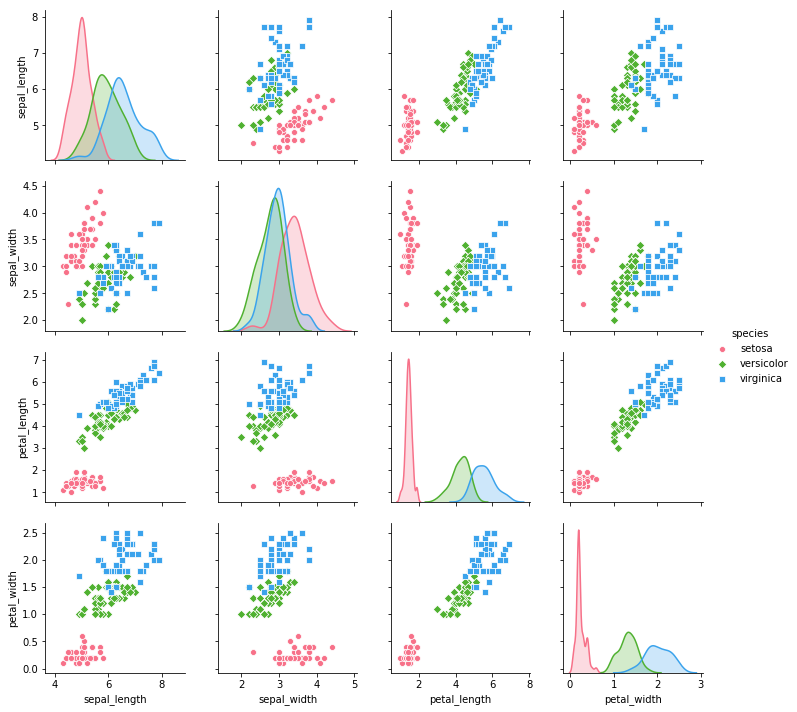

In [210]:
sns.pairplot(iris,hue='species',
             palette='husl',markers=['o','D','s'])

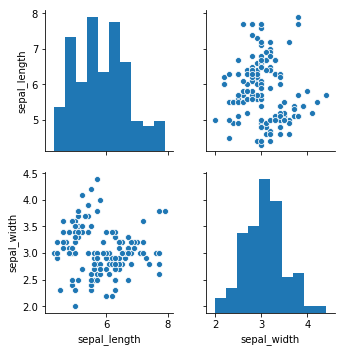

In [211]:
sns.pairplot(iris,vars=['sepal_length','sepal_width'])

In [212]:
# LESSON 22 PAIR PLOTS 2

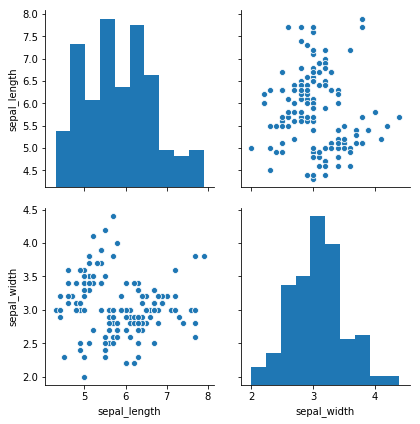

In [214]:
sns.pairplot(iris,vars=['sepal_length','sepal_width'],size=3)

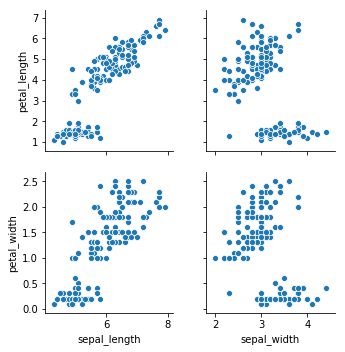

In [216]:
sns.pairplot(iris,x_vars=['sepal_length','sepal_width'],
             y_vars=['petal_length','petal_width'])

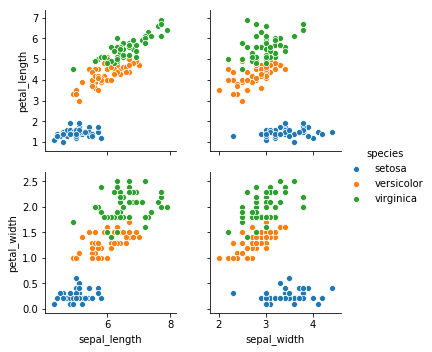

In [217]:
sns.pairplot(iris,x_vars=['sepal_length','sepal_width'],
             y_vars=['petal_length','petal_width'],hue='species')

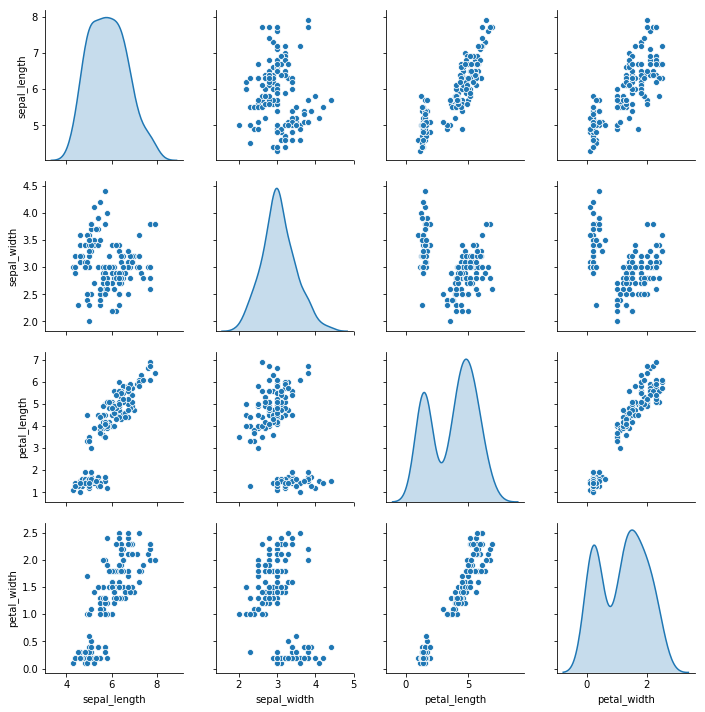

In [218]:
sns.pairplot(iris,diag_kind='kde')

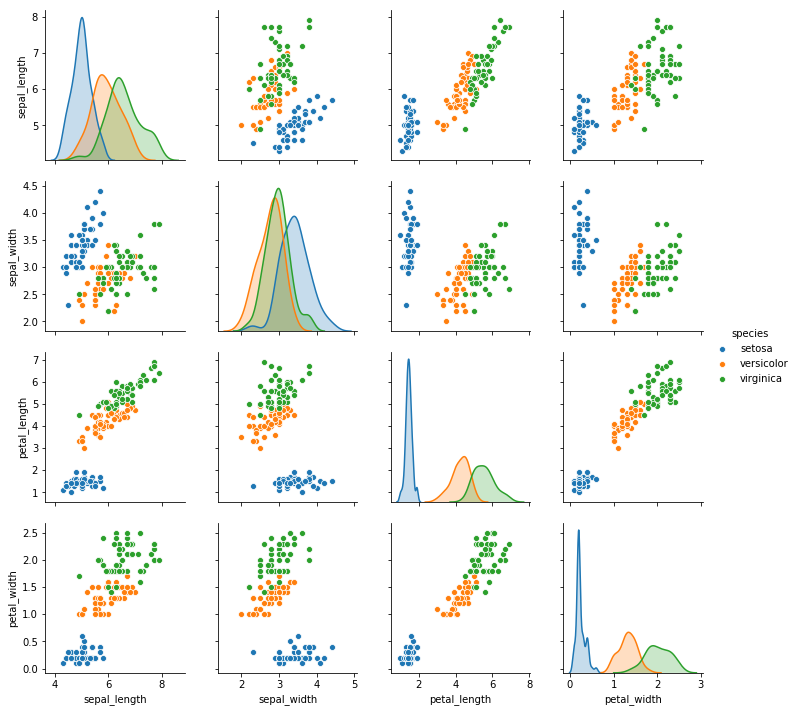

In [219]:
sns.pairplot(iris,diag_kind='kde',hue='species')

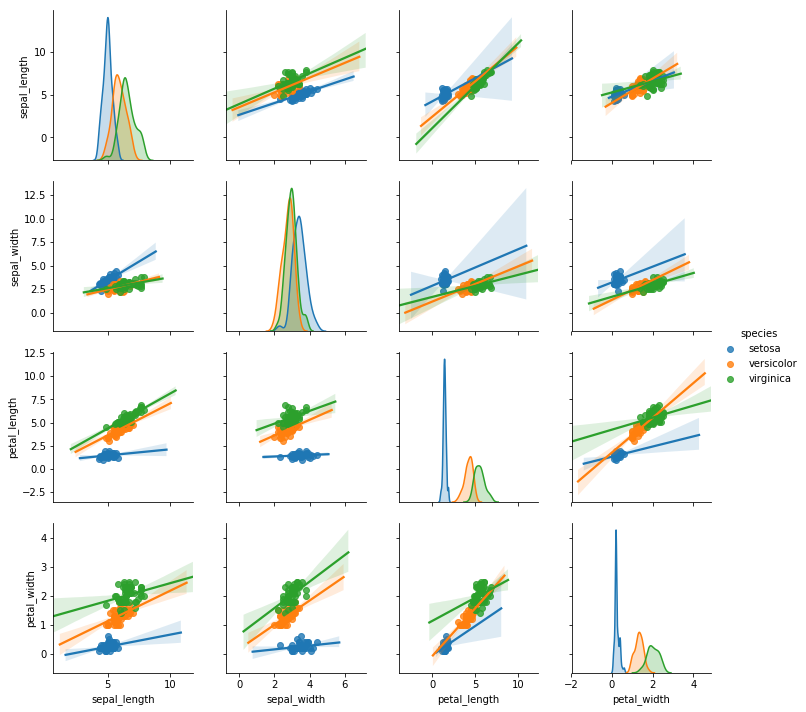

In [220]:
sns.pairplot(iris,kind='reg',hue='species')